In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import pycountry
import pycountry_convert as pc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import numpy as np

In [2]:
df = pd.read_csv("master.csv", index_col=0)
df

year     sex          age  suicides_no  population  \
country                                                          
Albania     1987    male  15-24 years           21      312900   
Albania     1987    male  35-54 years           16      308000   
Albania     1987  female  15-24 years           14      289700   
Albania     1987    male    75+ years            1       21800   
Albania     1987    male  25-34 years            9      274300   
...          ...     ...          ...          ...         ...   
Uzbekistan  2014  female  35-54 years          107     3620833   
Uzbekistan  2014  female    75+ years            9      348465   
Uzbekistan  2014    male   5-14 years           60     2762158   
Uzbekistan  2014  female   5-14 years           44     2631600   
Uzbekistan  2014  female  55-74 years           21     1438935   

            suicides/100k pop    country-year  HDI for year  \
country                                                       
Albania                  6.71     Albania1987           NaN   
Albania                  5.19     Albania1987           NaN   
Albania                  4.83     Albania1987           NaN   
Albania                  4.59     Albania1987           NaN   
Albania                  3.28     Albania1987           NaN   
...                       ...             ...           ...   
Uzbekistan               2.96  Uzbekistan2014         0.675   
Uzbekistan               2.58  Uzbekistan2014         0.675   
Uzbekistan               2.17  Uzbekistan2014         0.675   
Uzbekistan               1.67  Uzbekistan2014         0.675   
Uzbekistan               1.46  Uzbekistan2014         0.675   

            gdp_for_year ($)   gdp_per_capita ($)       generation  
country                                                             
Albania         2,156,624,900                 796     Generation X  
Albania         2,156,624,900                 796           Silent  
Albania         2,156,624,900                 796     Generation X  
Albania         2,156,624,900                 796  G.I. Generation  
Albania         2,156,624,900                 796          Boomers  
...                       ...                 ...              ...  
Uzbekistan     63,067,077,179                2309     Generation X  
Uzbekistan     63,067,077,179                2309           Silent  
Uzbekistan     63,067,077,179                2309     Generation Z  
Uzbekistan     63,067,077,179                2309     Generation Z  
Uzbekistan     63,067,077,179                2309          Boomers  

[27820 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   country-year        27820 non-null  object 
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


In [4]:
if 'country' in df.index.names:
    df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '')
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '], errors='coerce')
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year   gdp_for_year ($)   \
0                   6.71     Albania1987           NaN          2156624900   
1                   5.19     Albania1987           NaN          2156624900   
2                   4.83     Albania1987           NaN          2156624900   
3                   4.59     Albania1987           NaN          2156624900   
4                   3.28     Albania1987           NaN          2156624900   
...                  ...             ...           ...                 ...   
27815               2.96  Uzbekistan2014         0.675         63067077179   
27816               2.58  Uzbekistan2014         0.675         63067077179   
27817               2.17  Uzbekistan2014         0.675         63067077179   
27818               1.67  Uzbekistan2014         0.675         63067077179   
27819               1.46  Uzbekistan2014         0.675         63067077179   

       gdp_per_capita ($)       generation  
0                     796     Generation X  
1                     796           Silent  
2                     796     Generation X  
3                     796  G.I. Generation  
4                     796          Boomers  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[27820 rows x 12 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
df = df.drop(['HDI for year'], axis=1)
df = df.drop(['country-year'], axis=1)
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)  \
0                   6.71          2156624900                 796   
1                   5.19          2156624900                 796   
2                   4.83          2156624900                 796   
3                   4.59          2156624900                 796   
4                   3.28          2156624900                 796   
...                  ...                 ...                 ...   
27815               2.96         63067077179                2309   
27816               2.58         63067077179                2309   
27817               2.17         63067077179                2309   
27818               1.67         63067077179                2309   
27819               1.46         63067077179                2309   

            generation  
0         Generation X  
1               Silent  
2         Generation X  
3      G.I. Generation  
4              Boomers  
...                ...  
27815     Generation X  
27816           Silent  
27817     Generation Z  
27818     Generation Z  
27819          Boomers  

[27820 rows x 10 columns]

In [10]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

        gdp_for_year ($)   gdp_per_capita ($)  
count        2.782000e+04        27820.000000  
mean         4.455810e+11        16866.464414  
std          1.453610e+12        18887.576472  
min          4.691962e+07          251.000000  
25%          8.985353e+09         3447.000000  
50%          4.811469e+10         9372.000000  
75%          2.602024e+11        24874.000000  
max          1.812071e+13       126352.000000

In [11]:
# Identifying Year Range by Country
year_range_by_country = df.groupby('country')['year'].agg([min, max]).reset_index()
year_range_by_country.columns = ['Country', 'Start Year', 'End Year']
year_range_by_country

Country  Start Year  End Year
0                 Albania        1987      2010
1     Antigua and Barbuda        1985      2015
2               Argentina        1985      2015
3                 Armenia        1990      2016
4                   Aruba        1995      2011
..                    ...         ...       ...
96   United Arab Emirates        2005      2010
97         United Kingdom        1985      2015
98          United States        1985      2015
99                Uruguay        1985      2015
100            Uzbekistan        1990      2014

[101 rows x 3 columns]

In [12]:
n = year_range_by_country['Country'].unique()
len(n)

101

In [13]:
countries = df['country'].unique()
years = list(range(1985, 2017))
age_groups = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
sexes = ['male', 'female']
full_index = pd.MultiIndex.from_product([countries, years, sexes, age_groups], names=['country', 'year', 'sex', 'age'])
full_index

MultiIndex([(   'Albania', 1985,   'male',  '5-14 years'),
            (   'Albania', 1985,   'male', '15-24 years'),
            (   'Albania', 1985,   'male', '25-34 years'),
            (   'Albania', 1985,   'male', '35-54 years'),
            (   'Albania', 1985,   'male', '55-74 years'),
            (   'Albania', 1985,   'male',   '75+ years'),
            (   'Albania', 1985, 'female',  '5-14 years'),
            (   'Albania', 1985, 'female', '15-24 years'),
            (   'Albania', 1985, 'female', '25-34 years'),
            (   'Albania', 1985, 'female', '35-54 years'),
            ...
            ('Uzbekistan', 2016,   'male', '25-34 years'),
            ('Uzbekistan', 2016,   'male', '35-54 years'),
            ('Uzbekistan', 2016,   'male', '55-74 years'),
            ('Uzbekistan', 2016,   'male',   '75+ years'),
            ('Uzbekistan', 2016, 'female',  '5-14 years'),
            ('Uzbekistan', 2016, 'female', '15-24 years'),
            ('Uzbekistan', 2016, 'female

In [14]:
df = df.set_index(['country', 'year', 'sex', 'age'])
df_full = pd.DataFrame(index=full_index).join(df).reset_index()
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          NaN         NaN   
1         Albania  1985    male  15-24 years          NaN         NaN   
2         Albania  1985    male  25-34 years          NaN         NaN   
3         Albania  1985    male  35-54 years          NaN         NaN   
4         Albania  1985    male  55-74 years          NaN         NaN   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years          NaN         NaN   
38780  Uzbekistan  2016  female  25-34 years          NaN         NaN   
38781  Uzbekistan  2016  female  35-54 years          NaN         NaN   
38782  Uzbekistan  2016  female  55-74 years          NaN         NaN   
38783  Uzbekistan  2016  female    75+ years          NaN         NaN   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($) generation  
0                    NaN                 NaN                 NaN        NaN  
1                    NaN                 NaN                 NaN        NaN  
2                    NaN                 NaN                 NaN        NaN  
3                    NaN                 NaN                 NaN        NaN  
4                    NaN                 NaN                 NaN        NaN  
...                  ...                 ...                 ...        ...  
38779                NaN                 NaN                 NaN        NaN  
38780                NaN                 NaN                 NaN        NaN  
38781                NaN                 NaN                 NaN        NaN  
38782                NaN                 NaN                 NaN        NaN  
38783                NaN                 NaN                 NaN        NaN  

[38784 rows x 10 columns]

In [15]:
df_full['population'] = df_full.groupby(['country', 'sex', 'age'])['population'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          NaN    338200.0   
1         Albania  1985    male  15-24 years          NaN    312900.0   
2         Albania  1985    male  25-34 years          NaN    274300.0   
3         Albania  1985    male  35-54 years          NaN    308000.0   
4         Albania  1985    male  55-74 years          NaN    137500.0   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years          NaN   2992817.0   
38780  Uzbekistan  2016  female  25-34 years          NaN   2735238.0   
38781  Uzbekistan  2016  female  35-54 years          NaN   3620833.0   
38782  Uzbekistan  2016  female  55-74 years          NaN   1438935.0   
38783  Uzbekistan  2016  female    75+ years          NaN    348465.0   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($) generation  
0                    NaN                 NaN                 NaN        NaN  
1                    NaN                 NaN                 NaN        NaN  
2                    NaN                 NaN                 NaN        NaN  
3                    NaN                 NaN                 NaN        NaN  
4                    NaN                 NaN                 NaN        NaN  
...                  ...                 ...                 ...        ...  
38779                NaN                 NaN                 NaN        NaN  
38780                NaN                 NaN                 NaN        NaN  
38781                NaN                 NaN                 NaN        NaN  
38782                NaN                 NaN                 NaN        NaN  
38783                NaN                 NaN                 NaN        NaN  

[38784 rows x 10 columns]

In [16]:
df_full[[' gdp_for_year ($) ', 'gdp_per_capita ($)']] = df_full[[' gdp_for_year ($) ', 'gdp_per_capita ($)']].fillna(method='ffill').fillna(method='bfill')
df_full.head(50)

country  year     sex          age  suicides_no  population  \
0   Albania  1985    male   5-14 years          NaN    338200.0   
1   Albania  1985    male  15-24 years          NaN    312900.0   
2   Albania  1985    male  25-34 years          NaN    274300.0   
3   Albania  1985    male  35-54 years          NaN    308000.0   
4   Albania  1985    male  55-74 years          NaN    137500.0   
5   Albania  1985    male    75+ years          NaN     21800.0   
6   Albania  1985  female   5-14 years          NaN    311000.0   
7   Albania  1985  female  15-24 years          NaN    289700.0   
8   Albania  1985  female  25-34 years          NaN    257200.0   
9   Albania  1985  female  35-54 years          NaN    278800.0   
10  Albania  1985  female  55-74 years          NaN    144600.0   
11  Albania  1985  female    75+ years          NaN     35600.0   
12  Albania  1986    male   5-14 years          NaN    338200.0   
13  Albania  1986    male  15-24 years          NaN    312900.0   
14  Albania  1986    male  25-34 years          NaN    274300.0   
15  Albania  1986    male  35-54 years          NaN    308000.0   
16  Albania  1986    male  55-74 years          NaN    137500.0   
17  Albania  1986    male    75+ years          NaN     21800.0   
18  Albania  1986  female   5-14 years          NaN    311000.0   
19  Albania  1986  female  15-24 years          NaN    289700.0   
20  Albania  1986  female  25-34 years          NaN    257200.0   
21  Albania  1986  female  35-54 years          NaN    278800.0   
22  Albania  1986  female  55-74 years          NaN    144600.0   
23  Albania  1986  female    75+ years          NaN     35600.0   
24  Albania  1987    male   5-14 years          0.0    338200.0   
25  Albania  1987    male  15-24 years         21.0    312900.0   
26  Albania  1987    male  25-34 years          9.0    274300.0   
27  Albania  1987    male  35-54 years         16.0    308000.0   
28  Albania  1987    male  55-74 years          1.0    137500.0   
29  Albania  1987    male    75+ years          1.0     21800.0   
30  Albania  1987  female   5-14 years          0.0    311000.0   
31  Albania  1987  female  15-24 years         14.0    289700.0   
32  Albania  1987  female  25-34 years          4.0    257200.0   
33  Albania  1987  female  35-54 years          6.0    278800.0   
34  Albania  1987  female  55-74 years          0.0    144600.0   
35  Albania  1987  female    75+ years          1.0     35600.0   
36  Albania  1988    male   5-14 years          0.0    345000.0   
37  Albania  1988    male  15-24 years         17.0    319200.0   
38  Albania  1988    male  25-34 years          5.0    279900.0   
39  Albania  1988    male  35-54 years         14.0    314100.0   
40  Albania  1988    male  55-74 years          4.0    140200.0   
41  Albania  1988    male    75+ years          1.0     22300.0   
42  Albania  1988  female   5-14 years          0.0    317200.0   
43  Albania  1988  female  15-24 years          8.0    295600.0   
44  Albania  1988  female  25-34 years          5.0    262400.0   
45  Albania  1988  female  35-54 years          4.0    284500.0   
46  Albania  1988  female  55-74 years          3.0    147500.0   
47  Albania  1988  female    75+ years          2.0     36400.0   
48  Albania  1989    male   5-14 years          0.0    349700.0   
49  Albania  1989    male  15-24 years         12.0    323500.0   

    suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)       generation  
0                 NaN        2.156625e+09               796.0              NaN  
1                 NaN        2.156625e+09               796.0              NaN  
2                 NaN        2.156625e+09               796.0              NaN  
3                 NaN        2.156625e+09               796.0              NaN  
4                 NaN        2.156625e+09               796.0              NaN  
5                 NaN        2.156625e+09               796.0              NaN  
6                 N

In [17]:
def assign_generation(row):
    year = row['year']
    age = row['age']
    
    # Handling age group extraction
    # Handle '75+ years' case
    if '+' in age:
        approx_age = 75
    # Extract the starting value of age range
    else:
        approx_age = int(age.split('-')[0])
    
    # Calculate birth year
    birth_year = year - approx_age
    
    # Determine the generation based on birth year
    if birth_year < 1928:
        return 'G.I. Generation'
    elif 1928 <= birth_year <= 1945:
        return 'Silent'
    elif 1946 <= birth_year <= 1964:
        return 'Boomers'
    elif 1965 <= birth_year <= 1980:
        return 'Generation X'
    elif 1981 <= birth_year <= 1996:
        return 'Millennials'
    else:
        return 'Generation Z'

In [18]:
df_full['generation'] = df_full.apply(assign_generation, axis=1)
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          NaN    338200.0   
1         Albania  1985    male  15-24 years          NaN    312900.0   
2         Albania  1985    male  25-34 years          NaN    274300.0   
3         Albania  1985    male  35-54 years          NaN    308000.0   
4         Albania  1985    male  55-74 years          NaN    137500.0   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years          NaN   2992817.0   
38780  Uzbekistan  2016  female  25-34 years          NaN   2735238.0   
38781  Uzbekistan  2016  female  35-54 years          NaN   3620833.0   
38782  Uzbekistan  2016  female  55-74 years          NaN   1438935.0   
38783  Uzbekistan  2016  female    75+ years          NaN    348465.0   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)    generation  
0                    NaN        2.156625e+09               796.0  Generation X  
1                    NaN        2.156625e+09               796.0  Generation X  
2                    NaN        2.156625e+09               796.0       Boomers  
3                    NaN        2.156625e+09               796.0       Boomers  
4                    NaN        2.156625e+09               796.0        Silent  
...                  ...                 ...                 ...           ...  
38779                NaN        6.306708e+10              2309.0  Generation Z  
38780                NaN        6.306708e+10              2309.0   Millennials  
38781                NaN        6.306708e+10              2309.0   Millennials  
38782                NaN        6.306708e+10              2309.0       Boomers  
38783                NaN        6.306708e+10              2309.0        Silent  

[38784 rows x 10 columns]

In [19]:
df_full['suicides_no'] = df_full.groupby(['country', 'sex', 'age'])['suicides_no'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          0.0    338200.0   
1         Albania  1985    male  15-24 years         21.0    312900.0   
2         Albania  1985    male  25-34 years          9.0    274300.0   
3         Albania  1985    male  35-54 years         16.0    308000.0   
4         Albania  1985    male  55-74 years          1.0    137500.0   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years        347.0   2992817.0   
38780  Uzbekistan  2016  female  25-34 years        162.0   2735238.0   
38781  Uzbekistan  2016  female  35-54 years        107.0   3620833.0   
38782  Uzbekistan  2016  female  55-74 years         21.0   1438935.0   
38783  Uzbekistan  2016  female    75+ years          9.0    348465.0   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)    generation  
0                    NaN        2.156625e+09               796.0  Generation X  
1                    NaN        2.156625e+09               796.0  Generation X  
2                    NaN        2.156625e+09               796.0       Boomers  
3                    NaN        2.156625e+09               796.0       Boomers  
4                    NaN        2.156625e+09               796.0        Silent  
...                  ...                 ...                 ...           ...  
38779                NaN        6.306708e+10              2309.0  Generation Z  
38780                NaN        6.306708e+10              2309.0   Millennials  
38781                NaN        6.306708e+10              2309.0   Millennials  
38782                NaN        6.306708e+10              2309.0       Boomers  
38783                NaN        6.306708e+10              2309.0        Silent  

[38784 rows x 10 columns]

In [20]:
df_full['suicides/100k pop'] = df_full.apply(lambda x: round(x['suicides_no'] / (x['population'] / 100000), 2) if pd.notnull(x['suicides_no']) and pd.notnull(x['population']) else x['suicides/100k pop'], axis=1)
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          0.0    338200.0   
1         Albania  1985    male  15-24 years         21.0    312900.0   
2         Albania  1985    male  25-34 years          9.0    274300.0   
3         Albania  1985    male  35-54 years         16.0    308000.0   
4         Albania  1985    male  55-74 years          1.0    137500.0   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years        347.0   2992817.0   
38780  Uzbekistan  2016  female  25-34 years        162.0   2735238.0   
38781  Uzbekistan  2016  female  35-54 years        107.0   3620833.0   
38782  Uzbekistan  2016  female  55-74 years         21.0   1438935.0   
38783  Uzbekistan  2016  female    75+ years          9.0    348465.0   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)    generation  
0                   0.00        2.156625e+09               796.0  Generation X  
1                   6.71        2.156625e+09               796.0  Generation X  
2                   3.28        2.156625e+09               796.0       Boomers  
3                   5.19        2.156625e+09               796.0       Boomers  
4                   0.73        2.156625e+09               796.0        Silent  
...                  ...                 ...                 ...           ...  
38779              11.59        6.306708e+10              2309.0  Generation Z  
38780               5.92        6.306708e+10              2309.0   Millennials  
38781               2.96        6.306708e+10              2309.0   Millennials  
38782               1.46        6.306708e+10              2309.0       Boomers  
38783               2.58        6.306708e+10              2309.0        Silent  

[38784 rows x 10 columns]

In [21]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return country_name

In [22]:
df_full['continent'] = df_full['country'].apply(country_to_continent)
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          0.0    338200.0   
1         Albania  1985    male  15-24 years         21.0    312900.0   
2         Albania  1985    male  25-34 years          9.0    274300.0   
3         Albania  1985    male  35-54 years         16.0    308000.0   
4         Albania  1985    male  55-74 years          1.0    137500.0   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years        347.0   2992817.0   
38780  Uzbekistan  2016  female  25-34 years        162.0   2735238.0   
38781  Uzbekistan  2016  female  35-54 years        107.0   3620833.0   
38782  Uzbekistan  2016  female  55-74 years         21.0   1438935.0   
38783  Uzbekistan  2016  female    75+ years          9.0    348465.0   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)  \
0                   0.00        2.156625e+09               796.0   
1                   6.71        2.156625e+09               796.0   
2                   3.28        2.156625e+09               796.0   
3                   5.19        2.156625e+09               796.0   
4                   0.73        2.156625e+09               796.0   
...                  ...                 ...                 ...   
38779              11.59        6.306708e+10              2309.0   
38780               5.92        6.306708e+10              2309.0   
38781               2.96        6.306708e+10              2309.0   
38782               1.46        6.306708e+10              2309.0   
38783               2.58        6.306708e+10              2309.0   

         generation continent  
0      Generation X    Europe  
1      Generation X    Europe  
2           Boomers    Europe  
3           Boomers    Europe  
4            Silent    Europe  
...             ...       ...  
38779  Generation Z      Asia  
38780   Millennials      Asia  
38781   Millennials      Asia  
38782       Boomers      Asia  
38783        Silent      Asia  

[38784 rows x 11 columns]

In [23]:
print(df_full['continent'].unique())

['Europe' 'North America' 'South America' 'Asia' 'Oceania' 'Africa'
 'Macau' 'Republic of Korea' 'Saint Vincent and Grenadines' 'Turkey']


In [24]:
# Manual Mapping for Specific Countries
df_full.loc[df_full['country'] == 'Macau', 'continent'] = 'Asia'
df_full.loc[df_full['country'] == 'Republic of Korea', 'continent'] = 'Asia'
df_full.loc[df_full['country'] == 'Saint Vincent and Grenadines', 'continent'] = 'North America'
df_full.loc[df_full['country'] == 'Turkey', 'continent'] = 'Asia'
print(df_full['continent'].unique())

['Europe' 'North America' 'South America' 'Asia' 'Oceania' 'Africa']


In [25]:
df_full.isnull().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no           64
population            64
suicides/100k pop     64
 gdp_for_year ($)      0
gdp_per_capita ($)     0
generation             0
continent              0
dtype: int64

In [26]:
null_mask = df_full.isnull().any(axis=1)
null_rows = df_full[null_mask]
null_rows

country  year     sex         age  suicides_no  population  \
22656  Mongolia  1985    male  5-14 years          NaN         NaN   
22662  Mongolia  1985  female  5-14 years          NaN         NaN   
22668  Mongolia  1986    male  5-14 years          NaN         NaN   
22674  Mongolia  1986  female  5-14 years          NaN         NaN   
22680  Mongolia  1987    male  5-14 years          NaN         NaN   
...         ...   ...     ...         ...          ...         ...   
23010  Mongolia  2014  female  5-14 years          NaN         NaN   
23016  Mongolia  2015    male  5-14 years          NaN         NaN   
23022  Mongolia  2015  female  5-14 years          NaN         NaN   
23028  Mongolia  2016    male  5-14 years          NaN         NaN   
23034  Mongolia  2016  female  5-14 years          NaN         NaN   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)  \
22656                NaN        1.169623e+12             10228.0   
22662                NaN        1.169623e+12             10228.0   
22668                NaN        1.169623e+12             10228.0   
22674                NaN        1.169623e+12             10228.0   
22680                NaN        1.169623e+12             10228.0   
...                  ...                 ...                 ...   
23010                NaN        1.169623e+12             10228.0   
23016                NaN        1.169623e+12             10228.0   
23022                NaN        1.169623e+12             10228.0   
23028                NaN        1.169623e+12             10228.0   
23034                NaN        1.118346e+10              4145.0   

         generation continent  
22656  Generation X      Asia  
22662  Generation X      Asia  
22668   Millennials      Asia  
22674   Millennials      Asia  
22680   Millennials      Asia  
...             ...       ...  
23010  Generation Z      Asia  
23016  Generation Z      Asia  
23022  Generation Z      Asia  
23028  Generation Z      Asia  
23034  Generation Z      Asia  

[64 rows x 11 columns]

In [27]:
# Remove rows where 'country' is 'Mongolia' and 'age' is '5-14 years'
df_full = df_full[~((df_full['country'] == 'Mongolia') & (df_full['age'] == '5-14 years'))]
df_full

country  year     sex          age  suicides_no  population  \
0         Albania  1985    male   5-14 years          0.0    338200.0   
1         Albania  1985    male  15-24 years         21.0    312900.0   
2         Albania  1985    male  25-34 years          9.0    274300.0   
3         Albania  1985    male  35-54 years         16.0    308000.0   
4         Albania  1985    male  55-74 years          1.0    137500.0   
...           ...   ...     ...          ...          ...         ...   
38779  Uzbekistan  2016  female  15-24 years        347.0   2992817.0   
38780  Uzbekistan  2016  female  25-34 years        162.0   2735238.0   
38781  Uzbekistan  2016  female  35-54 years        107.0   3620833.0   
38782  Uzbekistan  2016  female  55-74 years         21.0   1438935.0   
38783  Uzbekistan  2016  female    75+ years          9.0    348465.0   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)  \
0                   0.00        2.156625e+09               796.0   
1                   6.71        2.156625e+09               796.0   
2                   3.28        2.156625e+09               796.0   
3                   5.19        2.156625e+09               796.0   
4                   0.73        2.156625e+09               796.0   
...                  ...                 ...                 ...   
38779              11.59        6.306708e+10              2309.0   
38780               5.92        6.306708e+10              2309.0   
38781               2.96        6.306708e+10              2309.0   
38782               1.46        6.306708e+10              2309.0   
38783               2.58        6.306708e+10              2309.0   

         generation continent  
0      Generation X    Europe  
1      Generation X    Europe  
2           Boomers    Europe  
3           Boomers    Europe  
4            Silent    Europe  
...             ...       ...  
38779  Generation Z      Asia  
38780   Millennials      Asia  
38781   Millennials      Asia  
38782       Boomers      Asia  
38783        Silent      Asia  

[38720 rows x 11 columns]

In [28]:
df_full.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
continent             0
dtype: int64

In [29]:
df_encoded = df_full.copy()
label_encoder = LabelEncoder()
categorical_cols = ['country', 'sex', 'age', 'generation', 'continent']

# Encoding each categorical column
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    
df_encoded

country  year  sex  age  suicides_no  population  suicides/100k pop  \
0            0  1985    1    3          0.0    338200.0               0.00   
1            0  1985    1    0         21.0    312900.0               6.71   
2            0  1985    1    1          9.0    274300.0               3.28   
3            0  1985    1    2         16.0    308000.0               5.19   
4            0  1985    1    4          1.0    137500.0               0.73   
...        ...   ...  ...  ...          ...         ...                ...   
38779      100  2016    0    0        347.0   2992817.0              11.59   
38780      100  2016    0    1        162.0   2735238.0               5.92   
38781      100  2016    0    2        107.0   3620833.0               2.96   
38782      100  2016    0    4         21.0   1438935.0               1.46   
38783      100  2016    0    5          9.0    348465.0               2.58   

        gdp_for_year ($)   gdp_per_capita ($)  generation  continent  
0            2.156625e+09               796.0           2          2  
1            2.156625e+09               796.0           2          2  
2            2.156625e+09               796.0           0          2  
3            2.156625e+09               796.0           0          2  
4            2.156625e+09               796.0           5          2  
...                   ...                 ...         ...        ...  
38779        6.306708e+10              2309.0           3          1  
38780        6.306708e+10              2309.0           4          1  
38781        6.306708e+10              2309.0           4          1  
38782        6.306708e+10              2309.0           0          1  
38783        6.306708e+10              2309.0           5          1  

[38720 rows x 11 columns]

In [30]:
df_encoded.describe()

country          year           sex           age   suicides_no  \
count  38720.000000  38720.000000  38720.000000  38720.000000  38720.000000   
mean      49.985124   2000.500000      0.500000      2.499174    198.582593   
std       29.176923      9.233212      0.500006      1.709137    800.508817   
min        0.000000   1985.000000      0.000000      0.000000      0.000000   
25%       25.000000   1992.750000      0.000000      1.000000      1.000000   
50%       50.000000   2000.500000      0.500000      2.000000     15.000000   
75%       75.000000   2008.250000      1.000000      4.000000    101.000000   
max      100.000000   2016.000000      1.000000      5.000000  22338.000000   

         population  suicides/100k pop   gdp_for_year ($)   \
count  3.872000e+04       38720.000000        3.872000e+04   
mean   1.558383e+06          12.203448        3.797302e+11   
std    3.534161e+06          19.723524        1.306870e+12   
min    2.780000e+02           0.000000        4.691962e+07   
25%    5.516100e+04           0.370000        6.349202e+09   
50%    3.324780e+05           4.720000        3.921255e+10   
75%    1.202137e+06          15.412500        2.165525e+11   
max    4.380521e+07         224.970000        1.812071e+13   

       gdp_per_capita ($)    generation     continent  
count        38720.000000  38720.000000  38720.000000  
mean         17322.191400      2.561002      2.249587  
std          19883.253215      1.719742      1.230021  
min            251.000000      0.000000      0.000000  
25%           3788.000000      1.000000      1.000000  
50%           9485.000000      2.000000      2.000000  
75%          23875.000000      4.000000      3.000000  
max         126352.000000      5.000000      5.000000

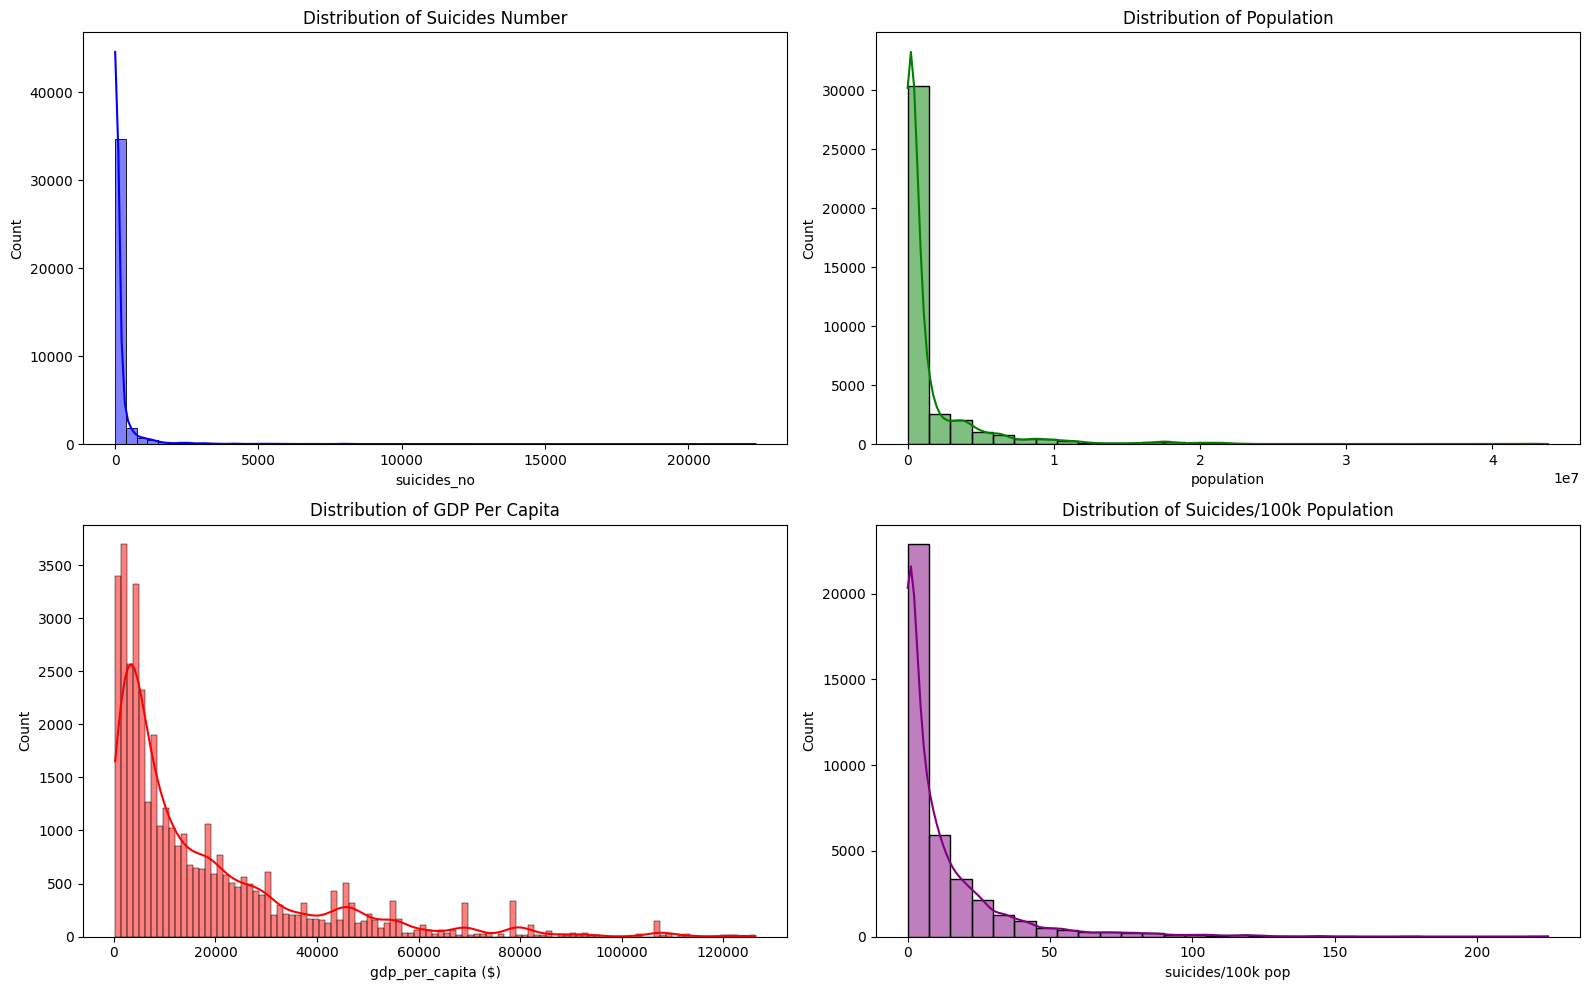

In [31]:
# Distribution of the Target Variable
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.histplot(df_full['suicides_no'], kde=True, color='blue', bins=60)
plt.title("Distribution of Suicides Number")

plt.subplot(2, 2, 2)
sns.histplot(df_full['population'], kde=True, color='green', bins=30)
plt.title("Distribution of Population")

plt.subplot(2, 2, 3)
sns.histplot(df_full['gdp_per_capita ($)'], kde=True, color='red')
plt.title("Distribution of GDP Per Capita")

plt.subplot(2, 2, 4)
sns.histplot(df_full['suicides/100k pop'], kde=True, color='purple', bins=30)
plt.title("Distribution of Suicides/100k Population")

plt.tight_layout()
plt.show()

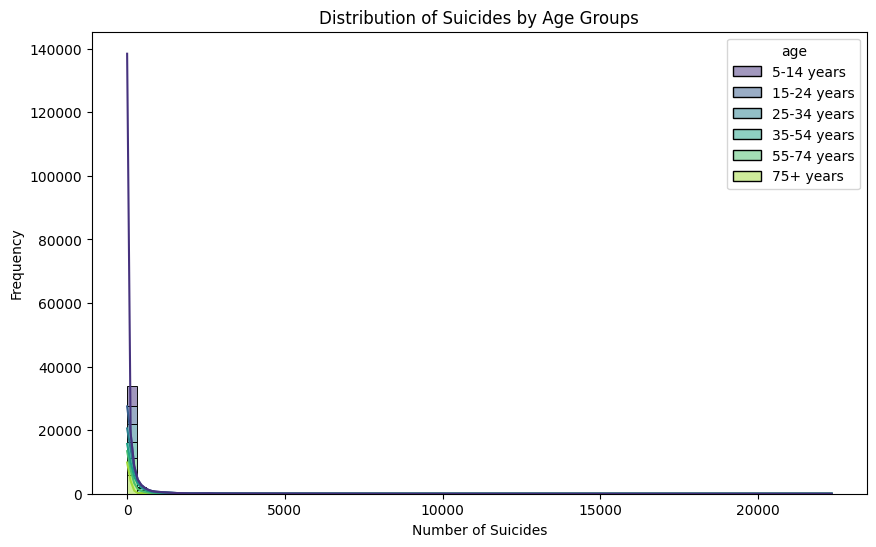

In [32]:
# Distribution of suicides for different age groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df_full, x='suicides_no', hue='age', multiple='stack', palette='viridis', kde=True, bins=75)
plt.title('Distribution of Suicides by Age Groups')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()

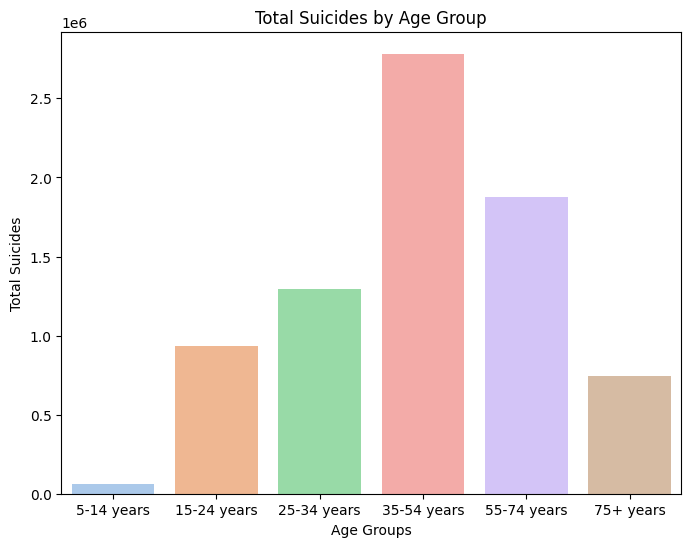

In [33]:
# Suicides by Age Groups
age_group_suicides = df_full.groupby('age')['suicides_no'].sum().reset_index()
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age_group_suicides['age'] = pd.Categorical(age_group_suicides['age'], categories=age_order, ordered=True)
plt.figure(figsize=(8, 6))
sns.barplot(data=age_group_suicides, x='age', y='suicides_no', palette='pastel')
plt.title('Total Suicides by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Total Suicides')
plt.show()

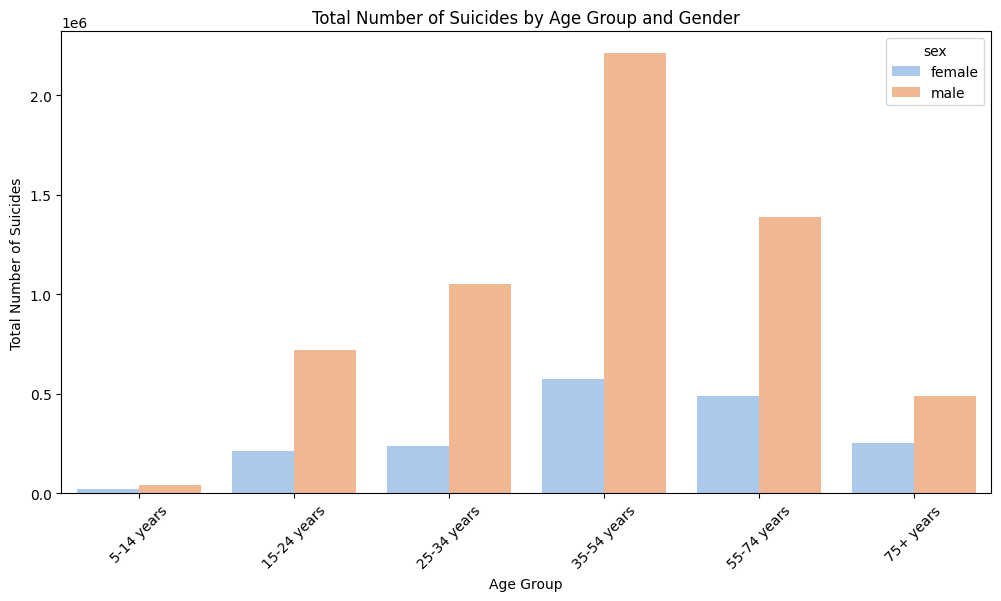

In [34]:
# Suicides by Age Groups and Gender
age_sex_suicides = df_full.groupby(['age', 'sex'])['suicides_no'].sum().reset_index()
age_sex_suicides['age'] = pd.Categorical(age_sex_suicides['age'], categories=age_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='suicides_no', hue='sex', data=age_sex_suicides, palette='pastel')
plt.title("Total Number of Suicides by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Total Number of Suicides")
plt.xticks(rotation=45)
plt.show()

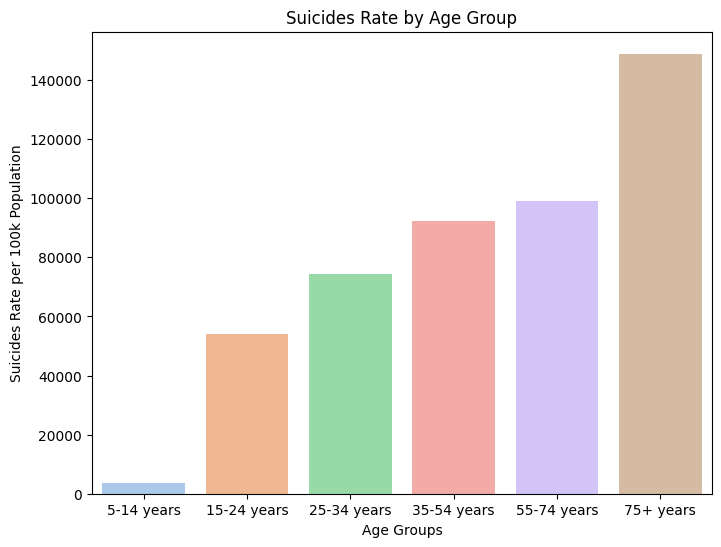

In [35]:
# Suicides Rate by Age Groups
age_group_suicides_rate = df_full.groupby('age')['suicides/100k pop'].sum().reset_index()
age_group_suicides_rate['age'] = pd.Categorical(age_group_suicides_rate['age'], categories=age_order, ordered=True)
plt.figure(figsize=(8, 6))
sns.barplot(data=age_group_suicides_rate, x='age', y='suicides/100k pop', palette='pastel')
plt.title('Suicides Rate by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Suicides Rate per 100k Population')
plt.show()

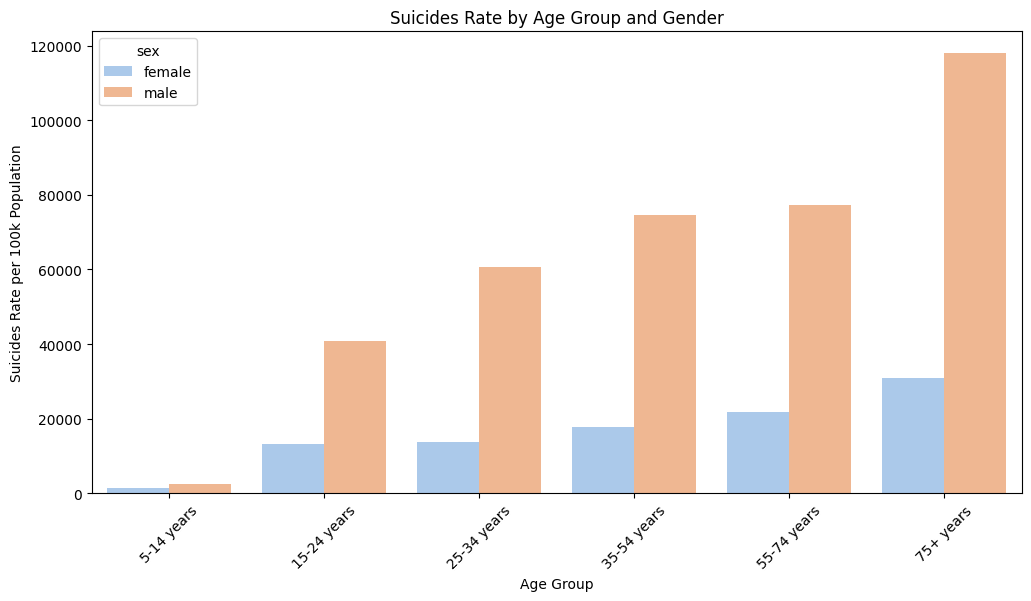

In [36]:
# Suicides Rate by Age Groups and Gender
age_sex_suicides_rate = df_full.groupby(['age', 'sex'])['suicides/100k pop'].sum().reset_index()
age_sex_suicides_rate['age'] = pd.Categorical(age_sex_suicides_rate['age'], categories=age_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='suicides/100k pop', hue='sex', data=age_sex_suicides_rate, palette='pastel')
plt.title("Suicides Rate by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Suicides Rate per 100k Population")
plt.xticks(rotation=45)
plt.show()

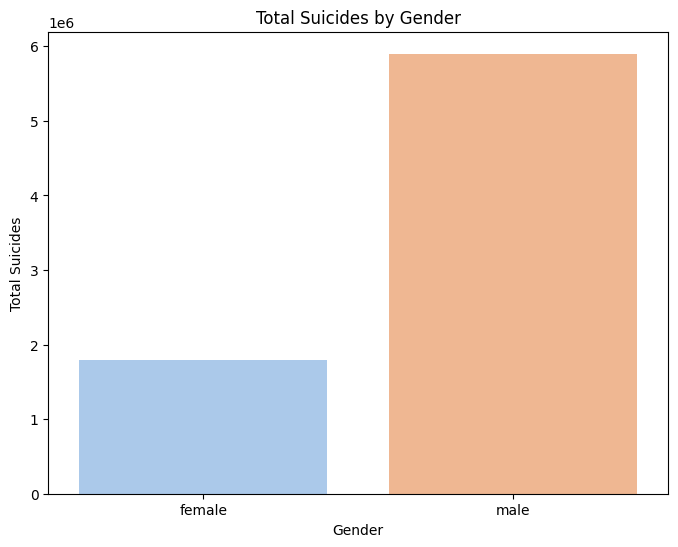

In [37]:
# Suicides by Gender
gender_suicides = df_full.groupby('sex')['suicides_no'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_suicides, x='sex', y='suicides_no', palette='pastel')
plt.title('Total Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.show()

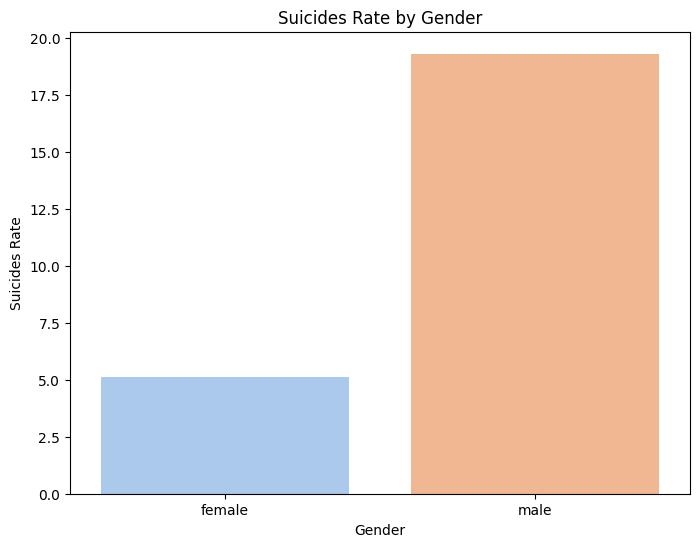

In [38]:
# Suicides Rate by Gender
gender_suicides_rate = df_full.groupby('sex')['suicides/100k pop'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_suicides_rate, x='sex', y='suicides/100k pop', palette='pastel')
plt.title('Suicides Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicides Rate')
plt.show()

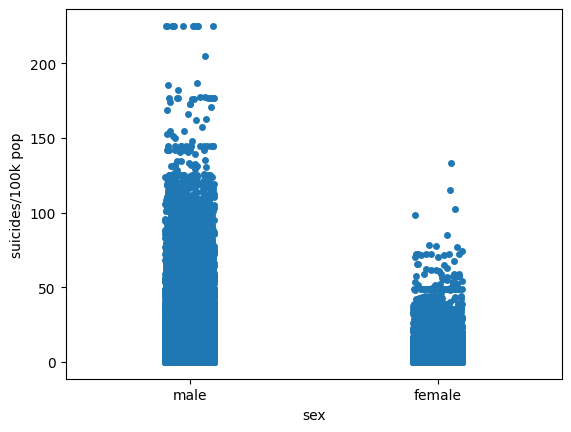

In [39]:
# Stripplot - suicides rate for both male and female
sns.stripplot(x= 'sex', y='suicides/100k pop', data= df_full,  jitter=True)
plt.show()

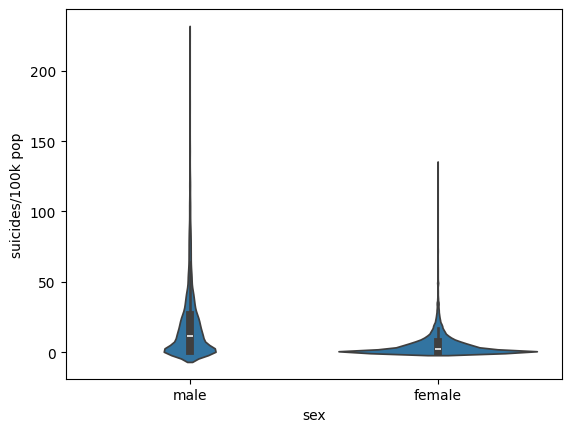

In [40]:
# Violin plot - distribution of suicides rate for both male and female
sns.violinplot(x= 'sex', y='suicides/100k pop', data = df_full)
plt.show()

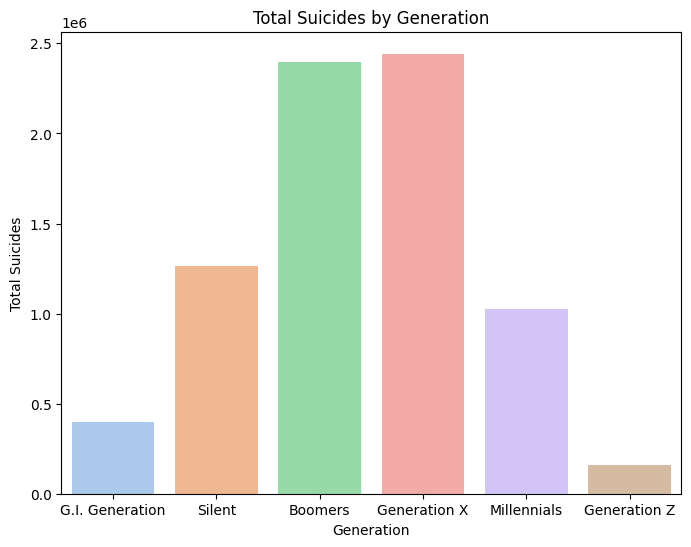

In [41]:
# Suicides by Generation
generation_suicides = df_full.groupby('generation')['suicides_no'].sum().reset_index()
generation_order = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millennials', 'Generation Z']
generation_suicides['generation'] = pd.Categorical(generation_suicides['generation'], categories=generation_order, ordered=True)
plt.figure(figsize=(8, 6))
sns.barplot(data=generation_suicides, x='generation', y='suicides_no', palette='pastel')
plt.title('Total Suicides by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Suicides')
plt.show()

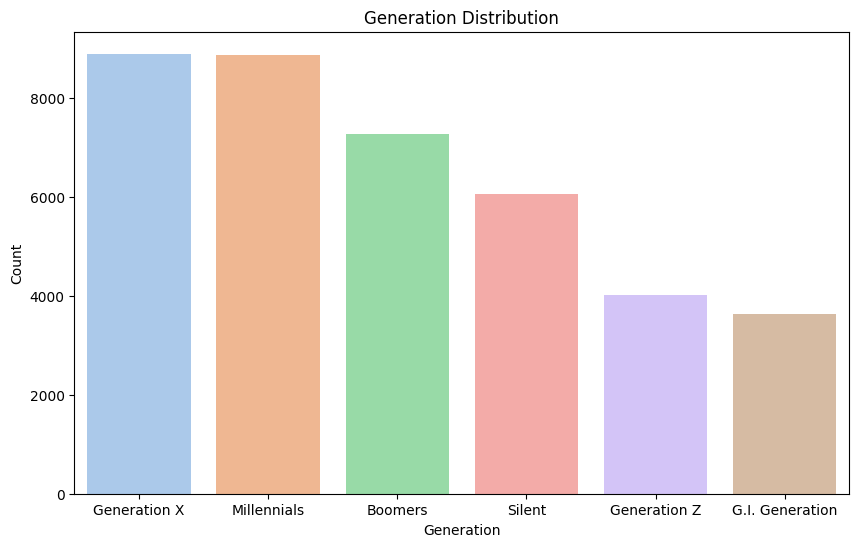

In [42]:
# Bar plot for generation distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='generation', data=df_full, palette='pastel', order=df_full['generation'].value_counts().index)
plt.title("Generation Distribution")
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()


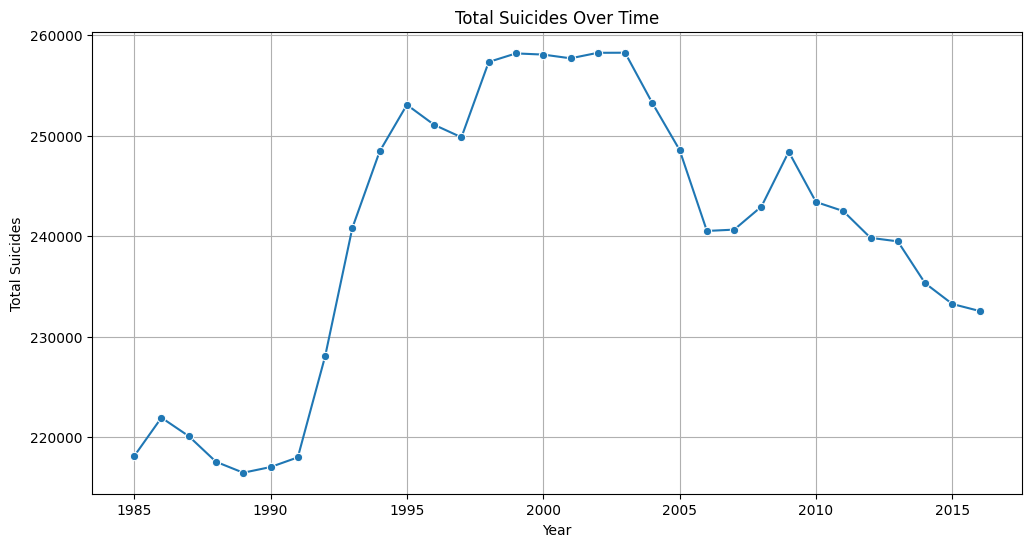

In [43]:
# Trend of total suicides over the years
yearly_suicides = df_full.groupby('year')['suicides_no'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides_no', data=yearly_suicides, marker='o')
plt.title('Total Suicides Over Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid()
plt.show()

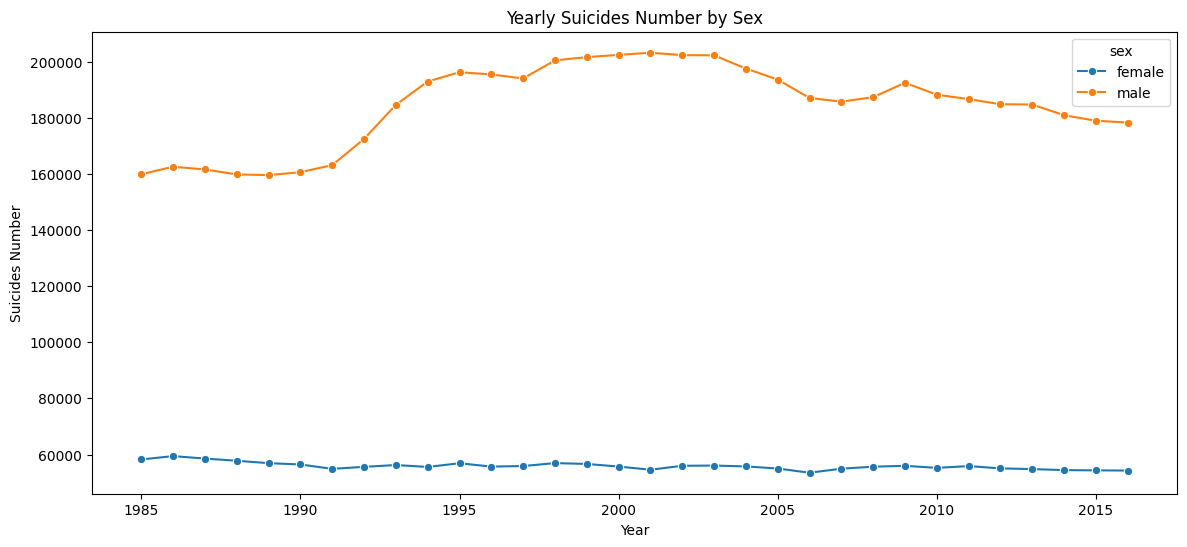

In [44]:
# Suicides number trends over the years by Gender
yearly_suicides_gender = df_full.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='suicides_no', hue='sex', data=yearly_suicides_gender, marker='o', errorbar=None)
plt.title("Yearly Suicides Number by Sex")
plt.xlabel("Year")
plt.ylabel("Suicides Number")
plt.show()

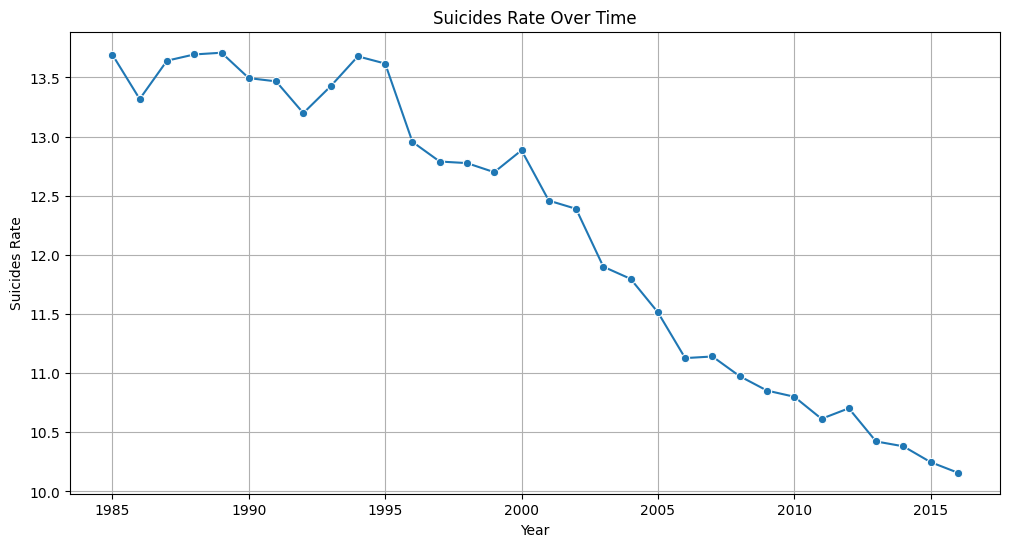

In [45]:
# Trend of suicides rate over the years
yearly_suicides = df_full.groupby('year')['suicides/100k pop'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides/100k pop', data=yearly_suicides, marker='o')
plt.title('Suicides Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Suicides Rate')
plt.grid()
plt.show()

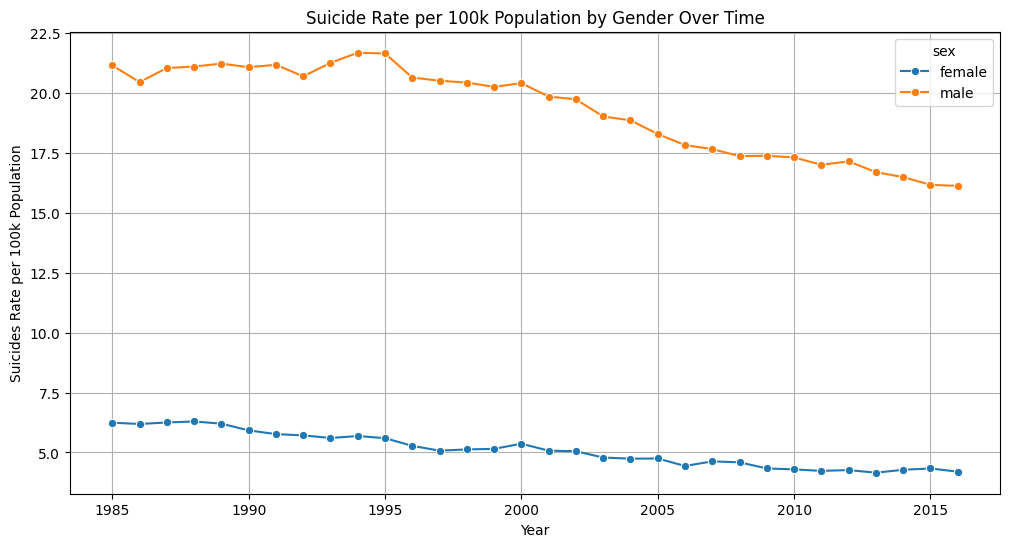

In [46]:
# Suicide Rate over Years by Gender
yearly_suicides_rate_gender = df_full.groupby(['year', 'sex'])['suicides/100k pop'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides/100k pop', data=yearly_suicides_rate_gender, hue='sex', marker='o', errorbar=None)
plt.title('Suicide Rate per 100k Population by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Suicides Rate per 100k Population')
plt.grid()
plt.show()

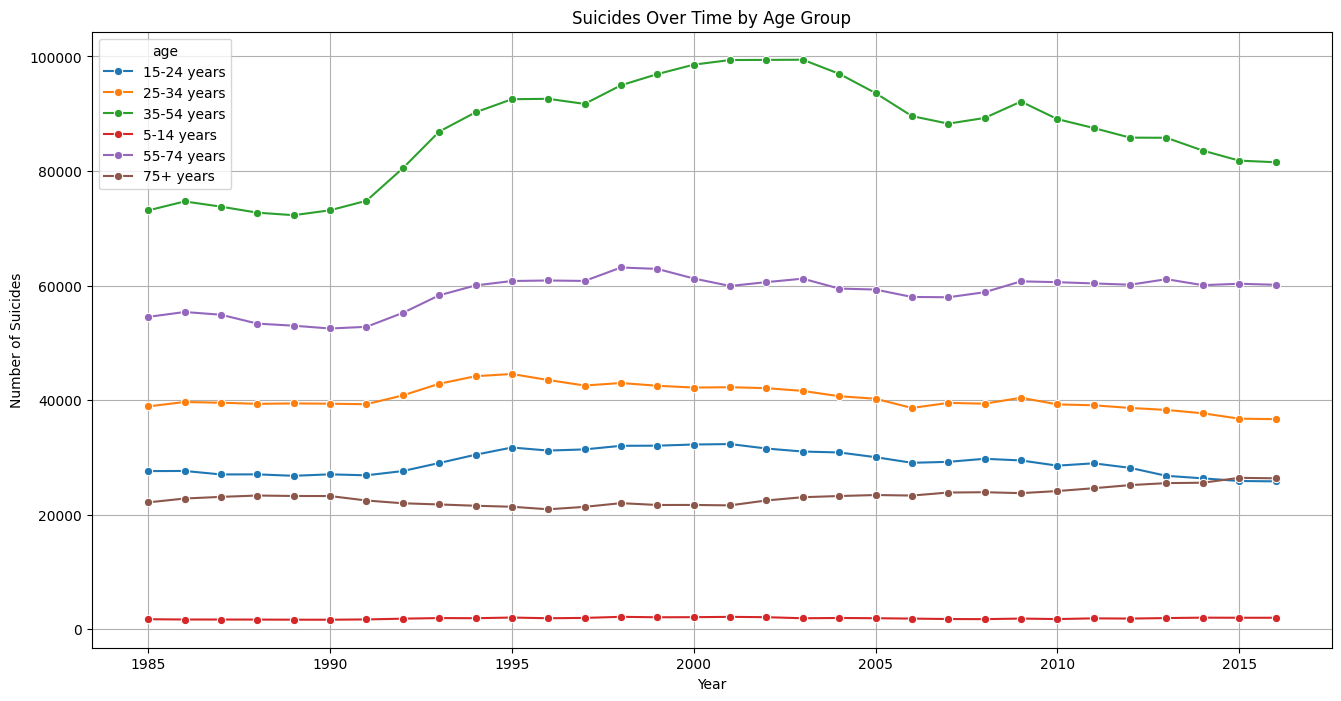

In [47]:
# Suicide Trends by Age Group
age_group_suicides = df_full.groupby(['year', 'age'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides_no', hue='age', data=age_group_suicides, marker='o')
plt.title('Suicides Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid()
plt.show()

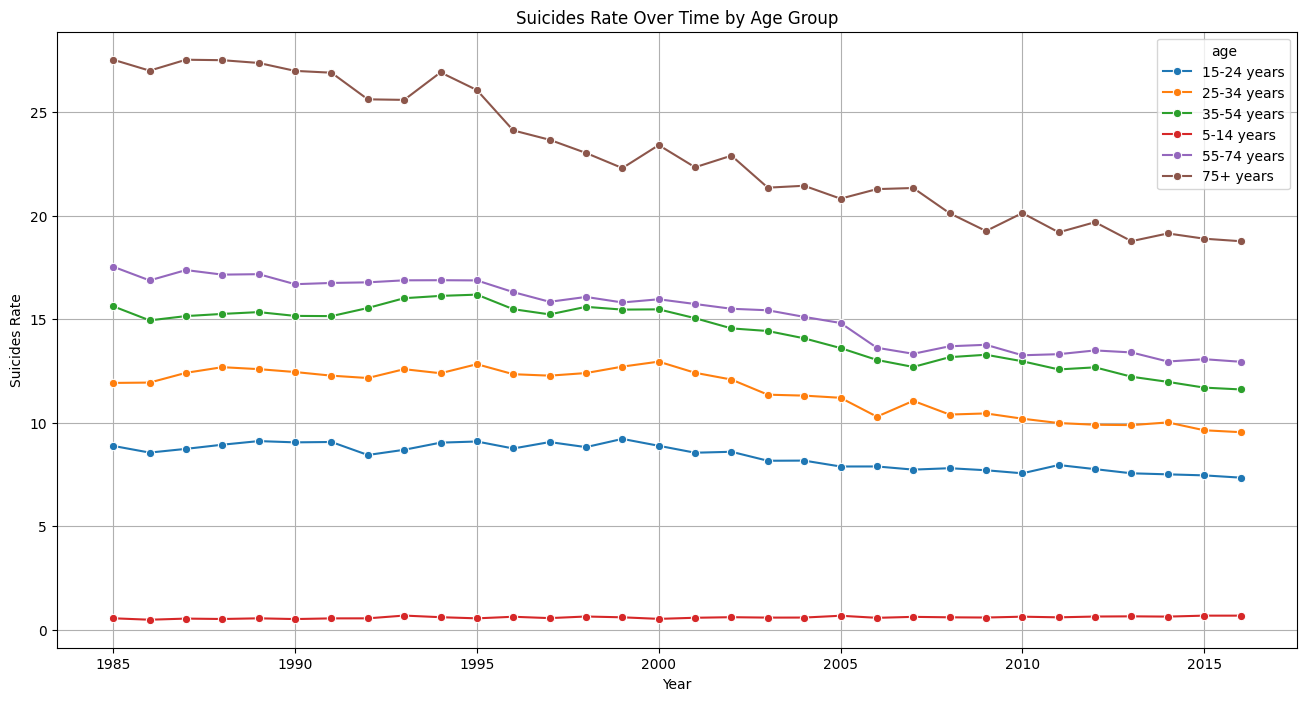

In [48]:
# Suicide Rate Trends by Age Group
age_group_suicides = df_full.groupby(['year', 'age'])['suicides/100k pop'].mean().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides/100k pop', hue='age', data=age_group_suicides, marker='o')
plt.title('Suicides Rate Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Suicides Rate')
plt.grid()
plt.show()

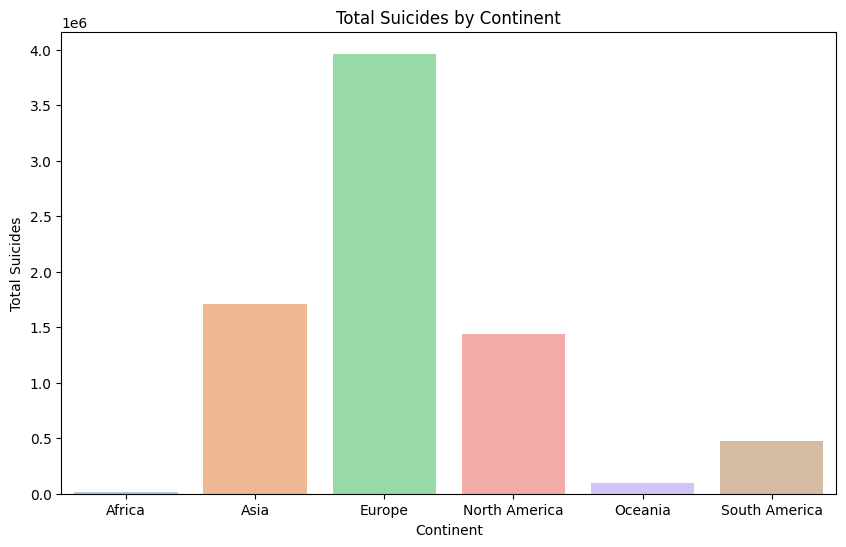

In [49]:
# Total Suicides by Continent
total_suicides_by_continent = df_full.groupby('continent')['suicides_no'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='suicides_no', data=total_suicides_by_continent, palette='pastel')
plt.title('Total Suicides by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Suicides')
plt.show()

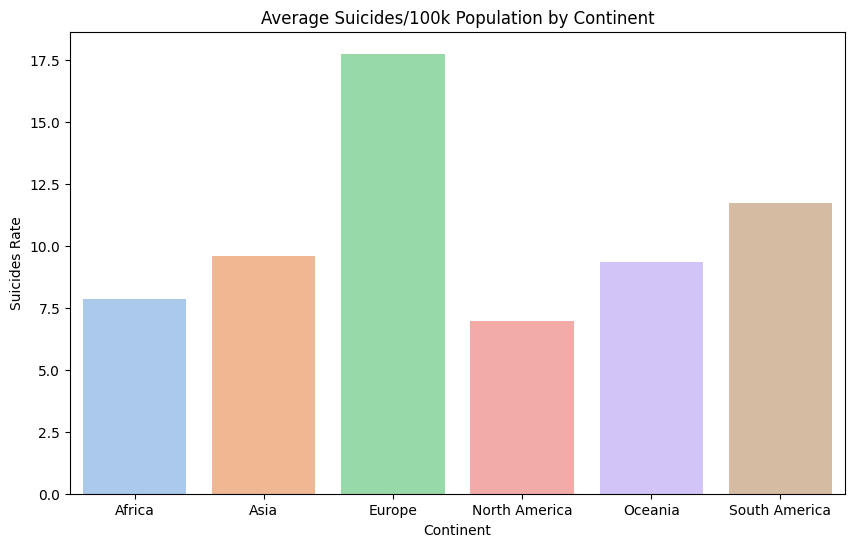

In [50]:
# Suicides Rate by Continent
avg_suicides_per_100k_by_continent = df_full.groupby('continent')['suicides/100k pop'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='suicides/100k pop', data=avg_suicides_per_100k_by_continent, palette='pastel')
plt.title('Average Suicides/100k Population by Continent')
plt.xlabel('Continent')
plt.ylabel('Suicides Rate')
plt.show()

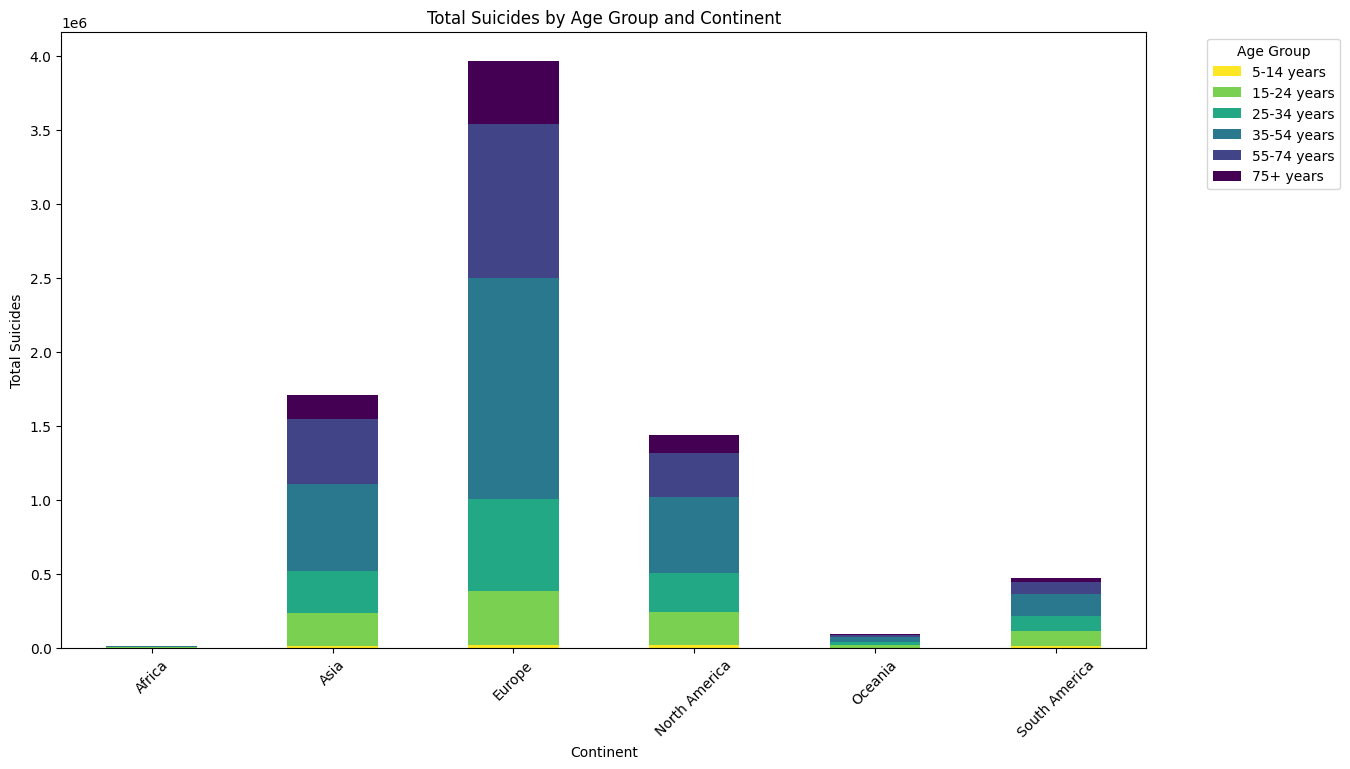

In [51]:
# Stacked Bar Chart - Suicides by Age Group and Continent
df_full['age'] = pd.Categorical(df_full['age'], categories=age_order, ordered=True)
continent_age_group = df_full.groupby(['continent', 'age'])['suicides_no'].sum().unstack().fillna(0)
continent_age_group.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis_r')
plt.title('Total Suicides by Age Group and Continent')
plt.xlabel('Continent')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [52]:
df_country_suicides = df_full.groupby('country')['suicides_no'].sum().reset_index()
fig = px.choropleth(
    df_country_suicides,
    locations='country',
    locationmode='country names',
    color='suicides_no',
    hover_name='country',
    color_continuous_scale='Reds',
    title='Total Suicides by Country'
)
fig.show()

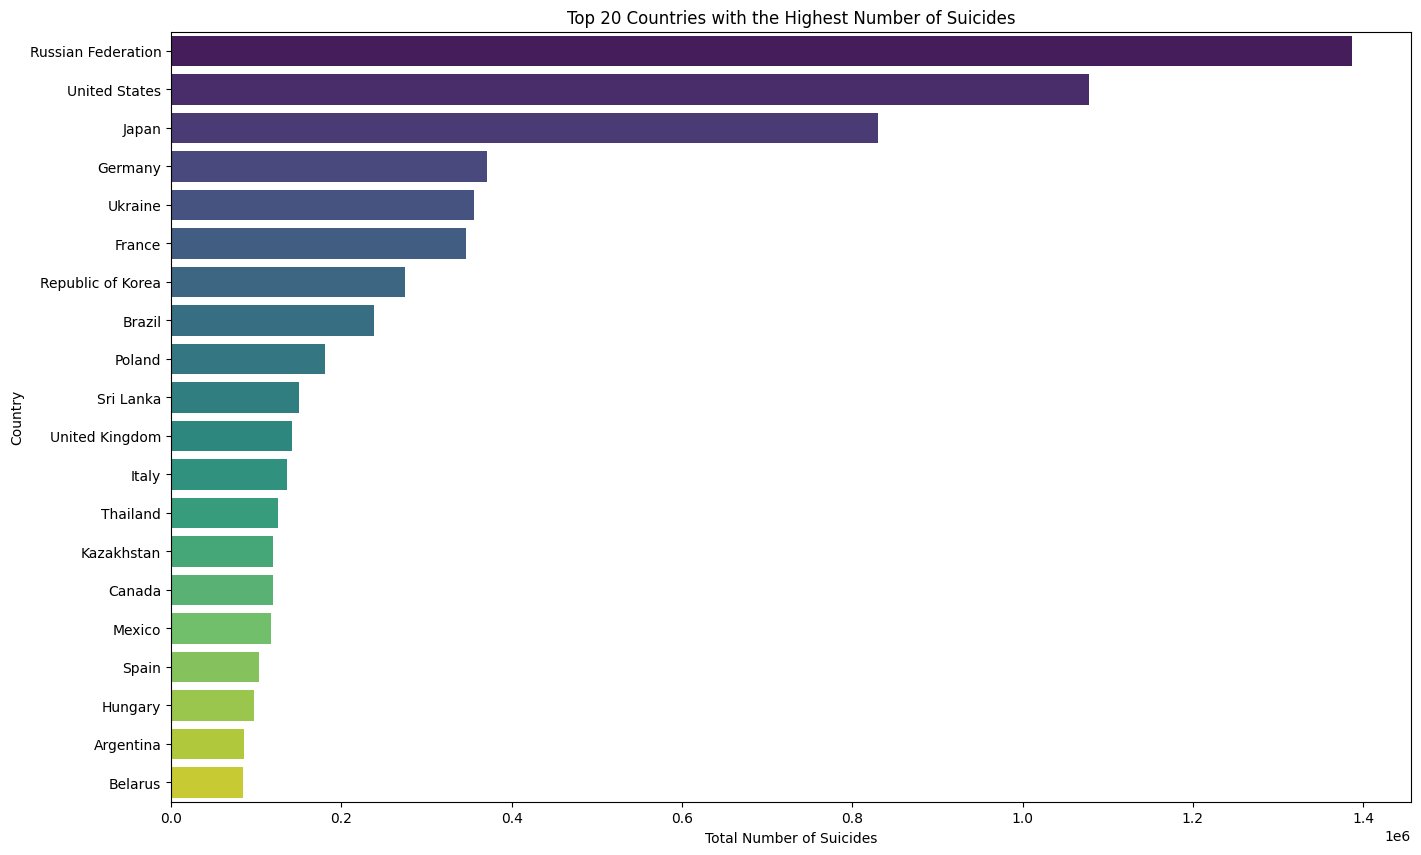

In [53]:
# Suicides by Country
plt.figure(figsize=(16, 10))
top_countries = df_full.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(20)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title("Top 20 Countries with the Highest Number of Suicides")
plt.xlabel("Total Number of Suicides")
plt.ylabel("Country")
plt.show()

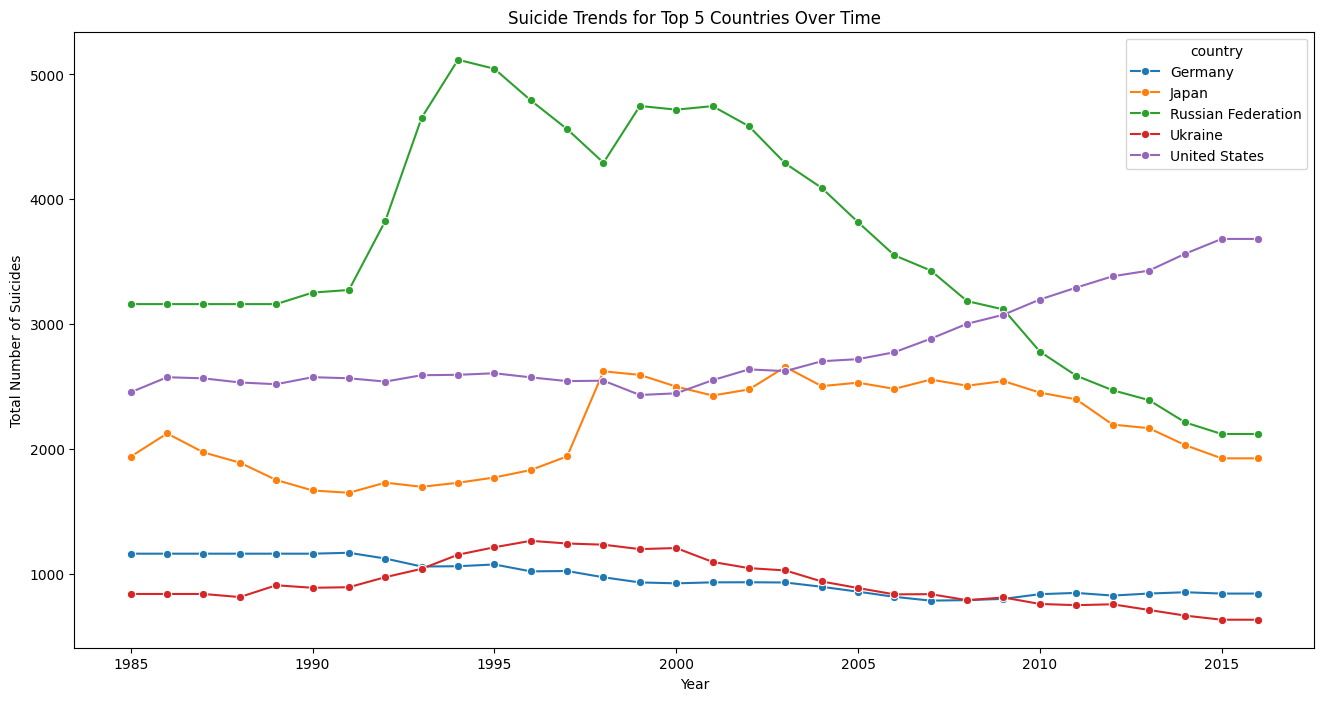

In [54]:
# Suicide Trends for Top 5 Countries Over Time
top_5_countries = df_full.groupby('country')['suicides_no'].sum().nlargest(5).index
df_top_5 = df_full[df_full['country'].isin(top_5_countries)]
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides_no', hue='country', data=df_top_5, marker='o', errorbar=None)
plt.title("Suicide Trends for Top 5 Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Total Number of Suicides")
plt.show()

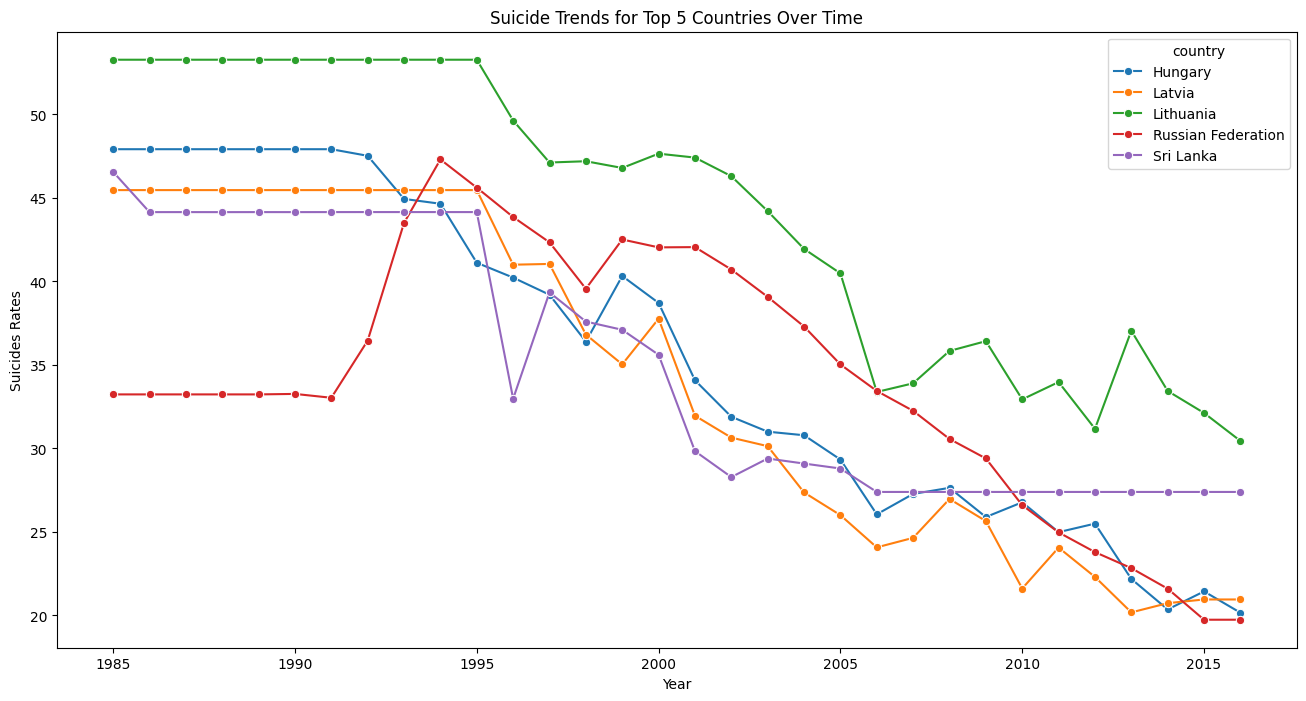

In [55]:
# Suicide Rates Trends for Top 5 Countries Over Time
top_5_countries = df_full.groupby('country')['suicides/100k pop'].mean().nlargest(5).index
df_top_5 = df_full[df_full['country'].isin(top_5_countries)]
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='suicides/100k pop', hue='country', data=df_top_5, marker='o', errorbar=None)
plt.title("Suicide Trends for Top 5 Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Suicides Rates")
plt.show()

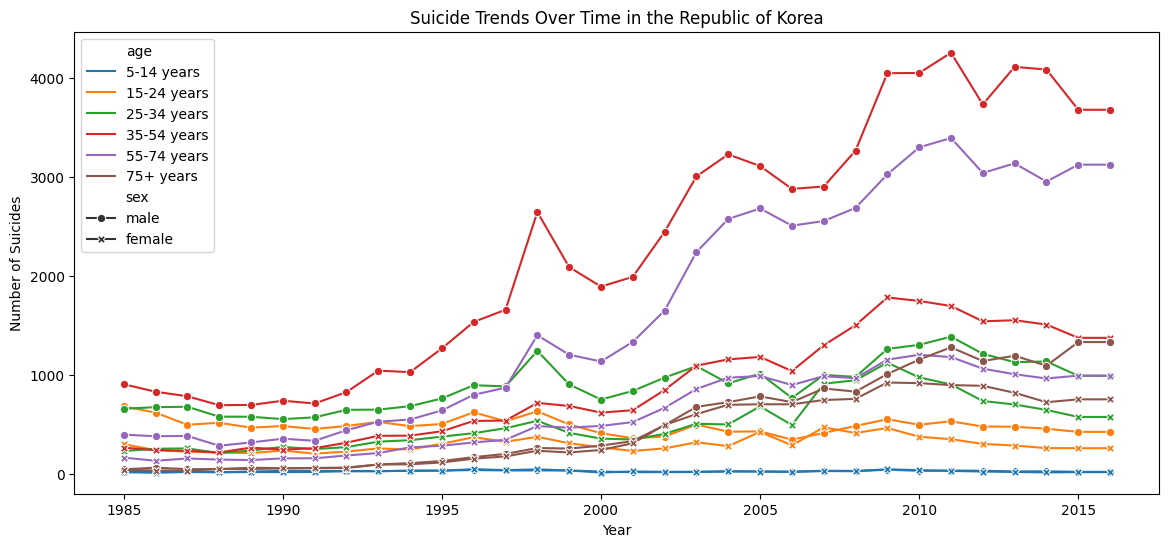

In [56]:
# Trend Analysis over the Years for specific counrty with sex and age groups
country_data = df_full[df_full['country'] == 'Republic of Korea']
plt.figure(figsize=(14, 6))
sns.lineplot(data=country_data, x='year', y='suicides_no', hue='age', style='sex', markers=True, dashes=False)
plt.title('Suicide Trends Over Time in the Republic of Korea')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()

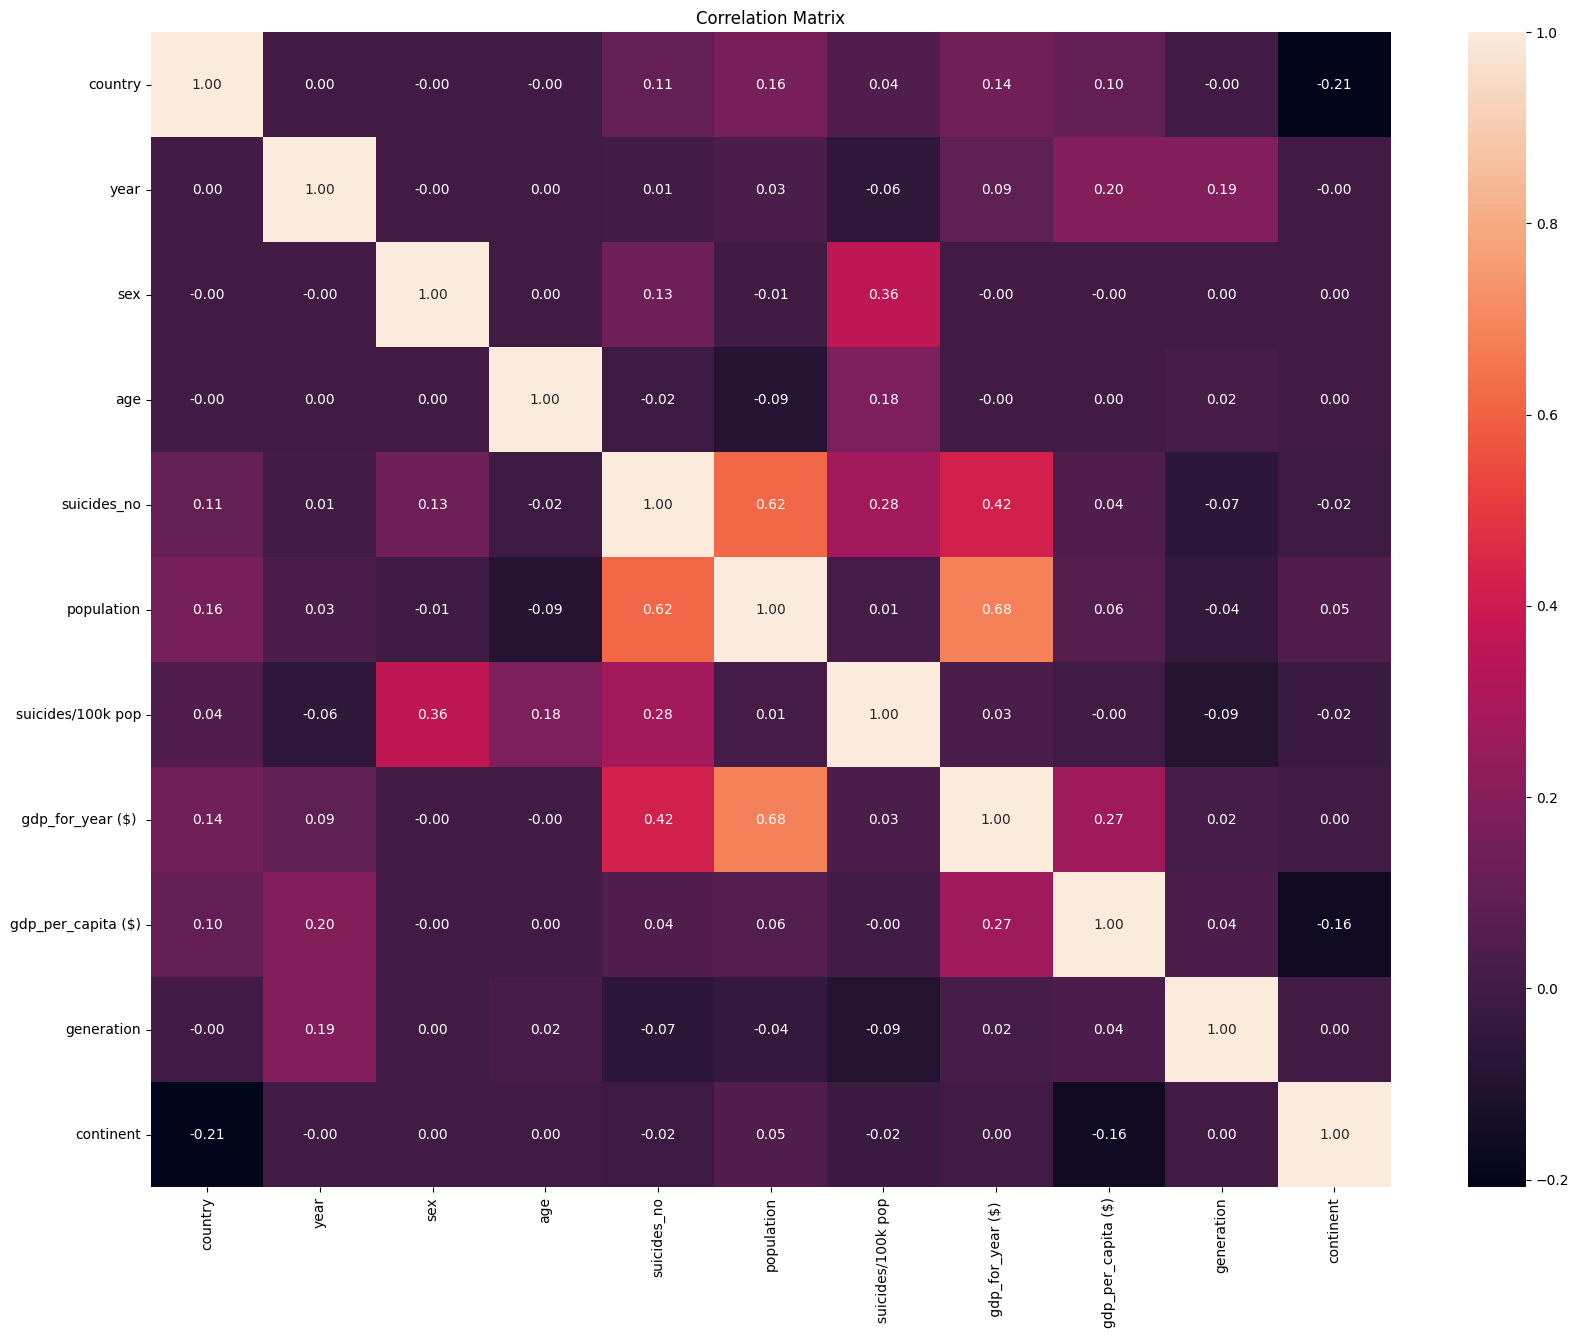

In [57]:
# Correlation Analysis
plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

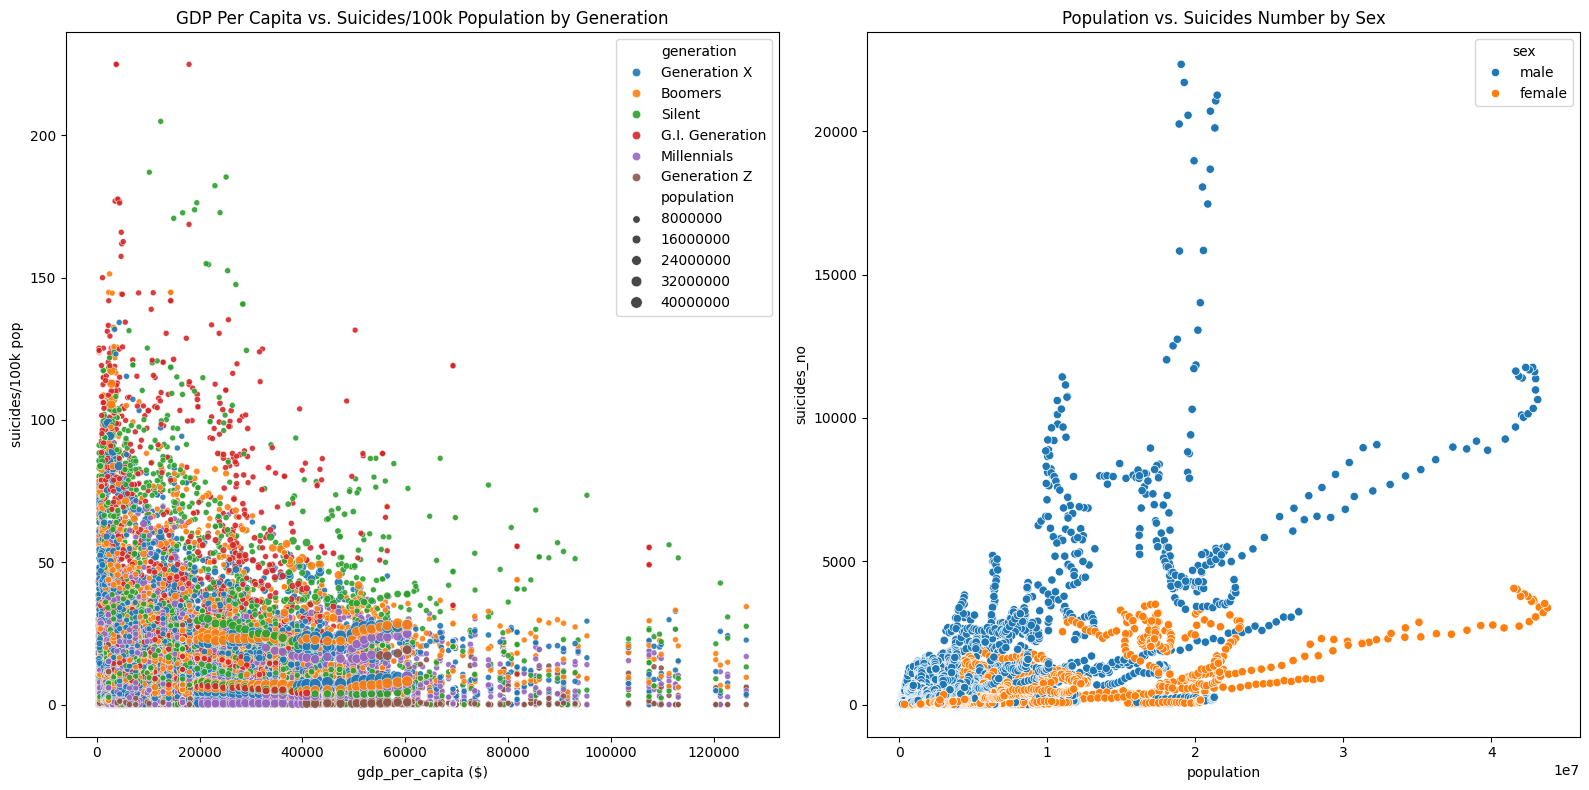

In [58]:
# Scatter plots to explore relationships between numeric features
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='generation', data=df_full, size='population', alpha=0.9)
plt.title("GDP Per Capita vs. Suicides/100k Population by Generation")

plt.subplot(1, 2, 2)
sns.scatterplot(x='population', y='suicides_no', hue='sex', data=df_full)
plt.title("Population vs. Suicides Number by Sex")

plt.tight_layout()
plt.show()

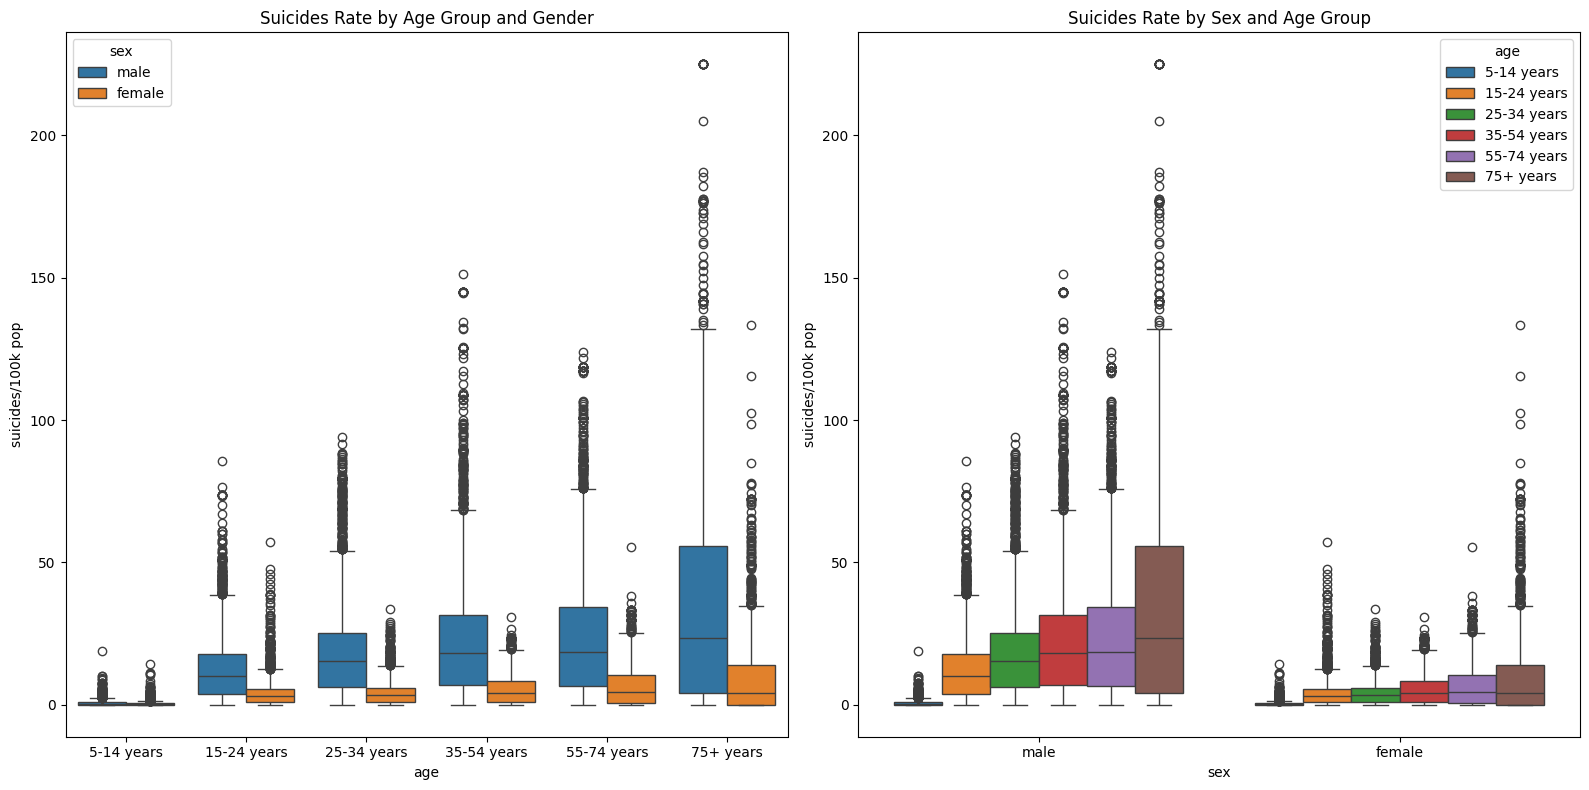

In [59]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='age', y='suicides/100k pop', hue='sex', data=df_full)
plt.title("Suicides Rate by Age Group and Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='suicides/100k pop', hue='age', data=df_full)
plt.title("Suicides Rate by Sex and Age Group")

plt.tight_layout()
plt.show()

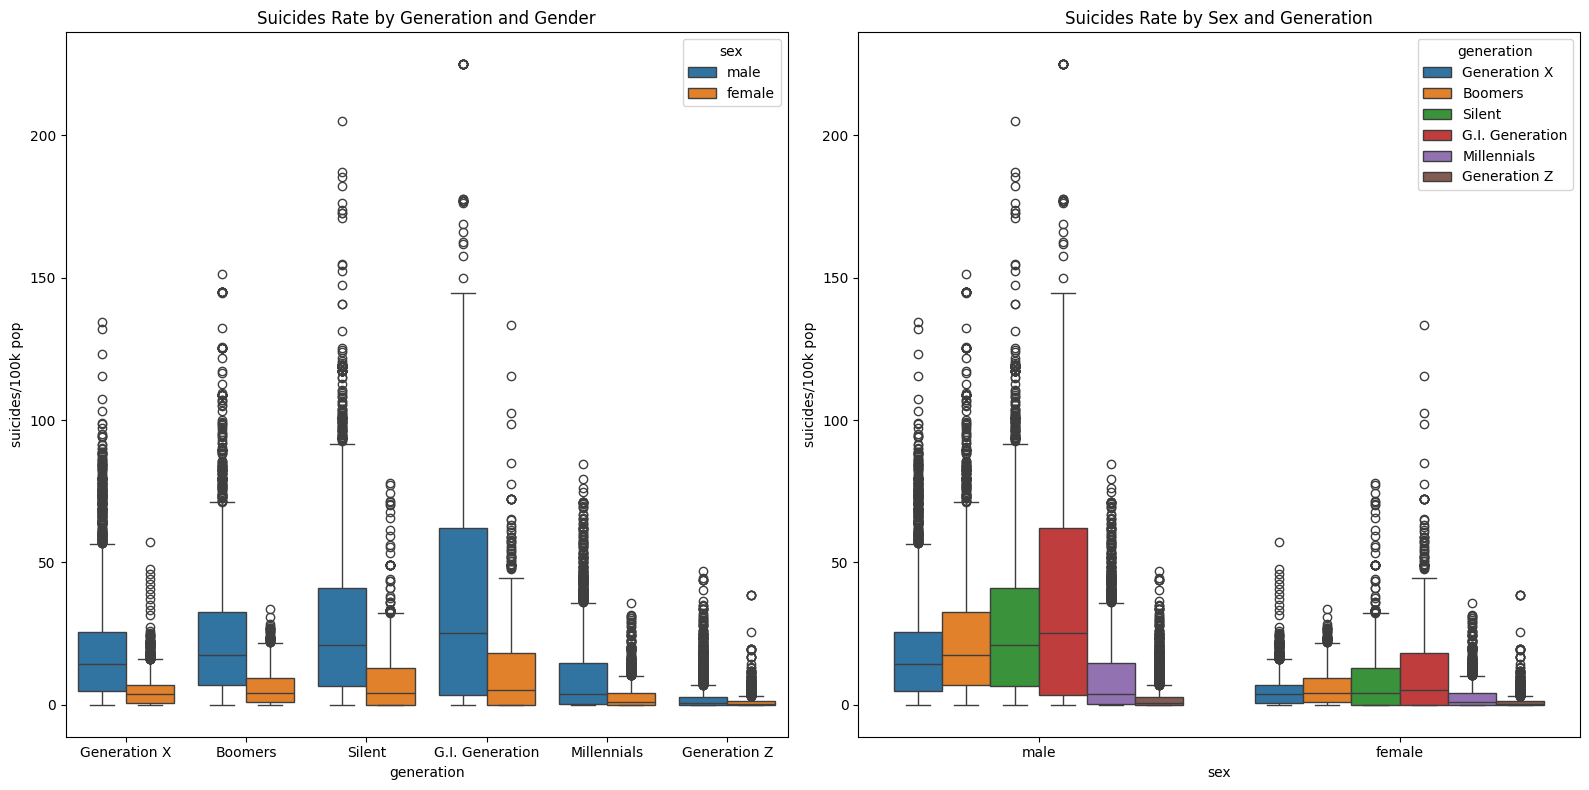

In [60]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='generation', y='suicides/100k pop', hue='sex', data=df_full)
plt.title("Suicides Rate by Generation and Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='suicides/100k pop', hue='generation', data=df_full)
plt.title("Suicides Rate by Sex and Generation")

plt.tight_layout()
plt.show()

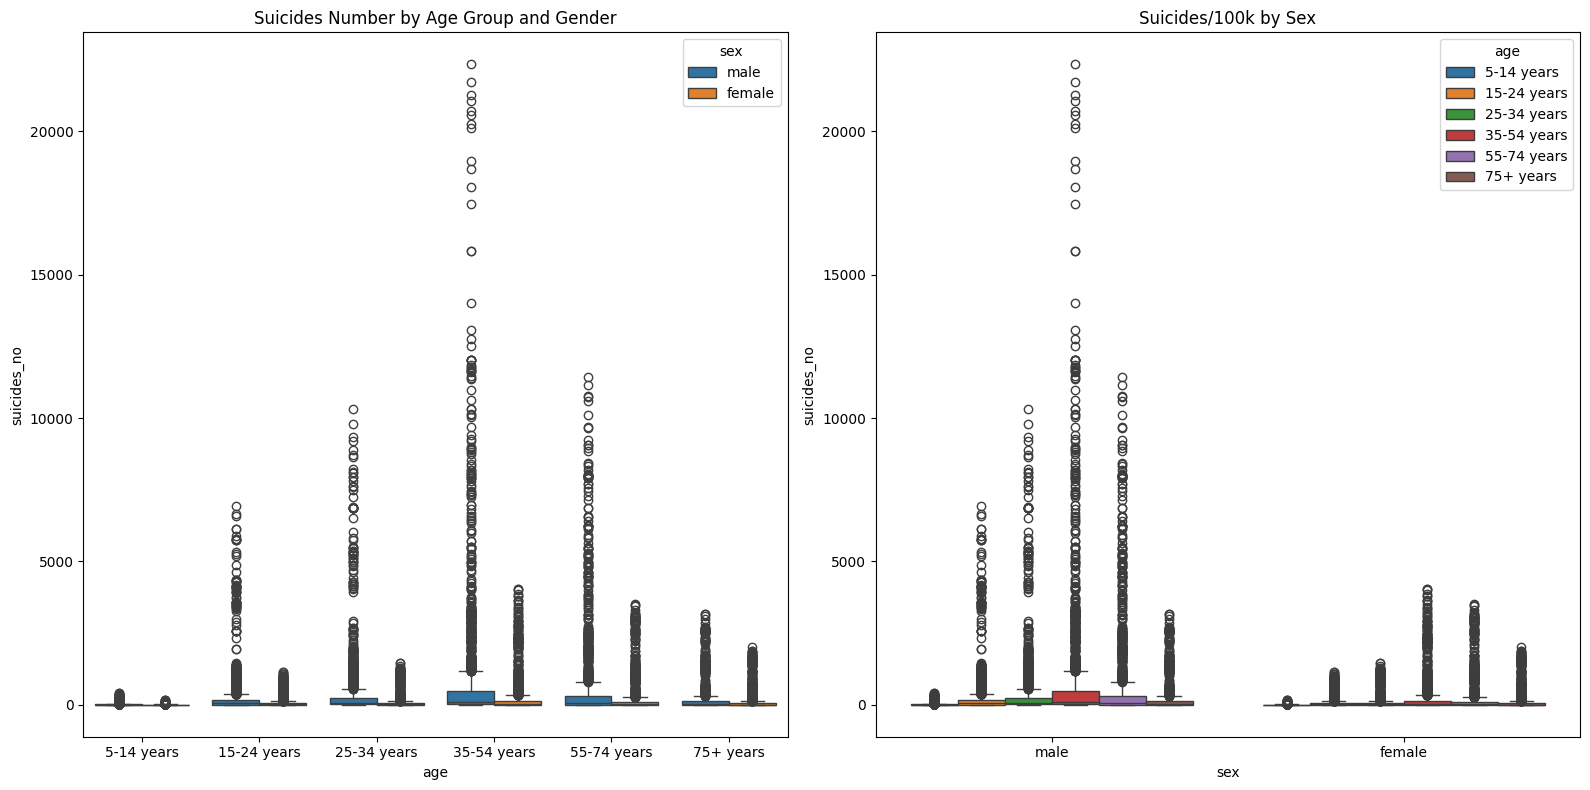

In [61]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='age', y='suicides_no', hue='sex', data=df_full)
plt.title("Suicides Number by Age Group and Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='suicides_no', hue='age', data=df_full)
plt.title("Suicides/100k by Sex")

plt.tight_layout()
plt.show()

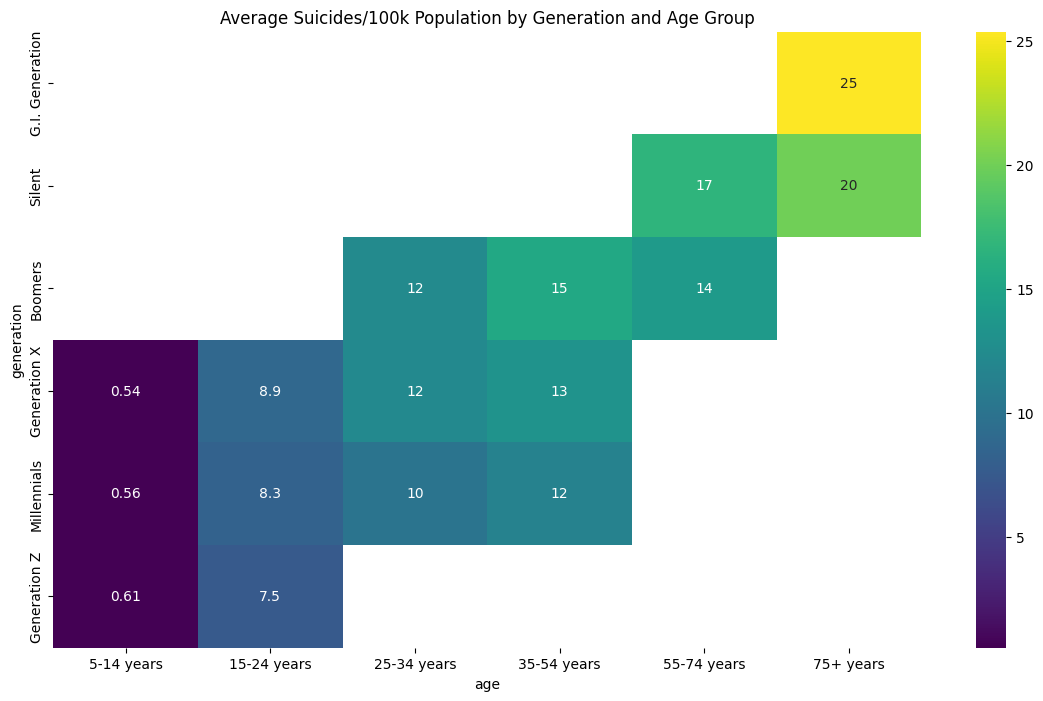

In [62]:
# Average Suicides/100k Population by Generation and Age Group
generation_age_group_avg = df_full.groupby(['generation', 'age'])['suicides/100k pop'].mean().unstack()
generation_age_group_avg = generation_age_group_avg.loc[generation_order, age_order]
plt.figure(figsize=(14, 8))
sns.heatmap(generation_age_group_avg, annot=True, cmap='viridis')
plt.title("Average Suicides/100k Population by Generation and Age Group")
plt.show()

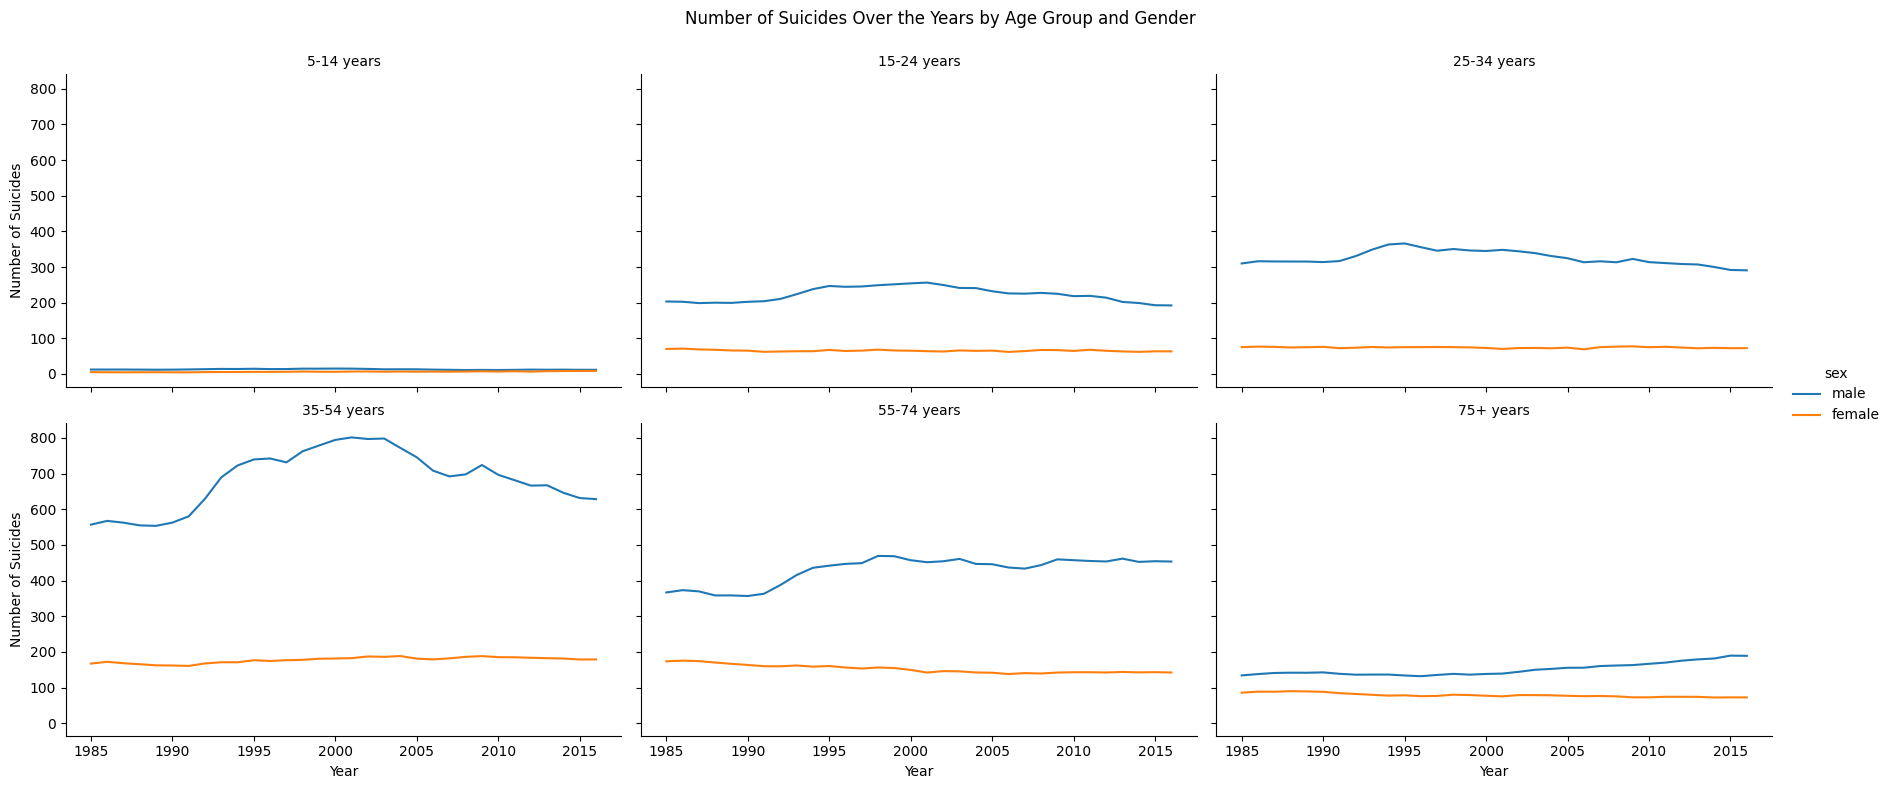

In [63]:
# FacetGrid plot to compare suicide rates by age group and sex over the years
g = sns.FacetGrid(df_full, col='age', hue='sex', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'year', 'suicides_no', errorbar=None)
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Suicides")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Suicides Over the Years by Age Group and Gender')
plt.show()

<Figure size 1000x1000 with 0 Axes>

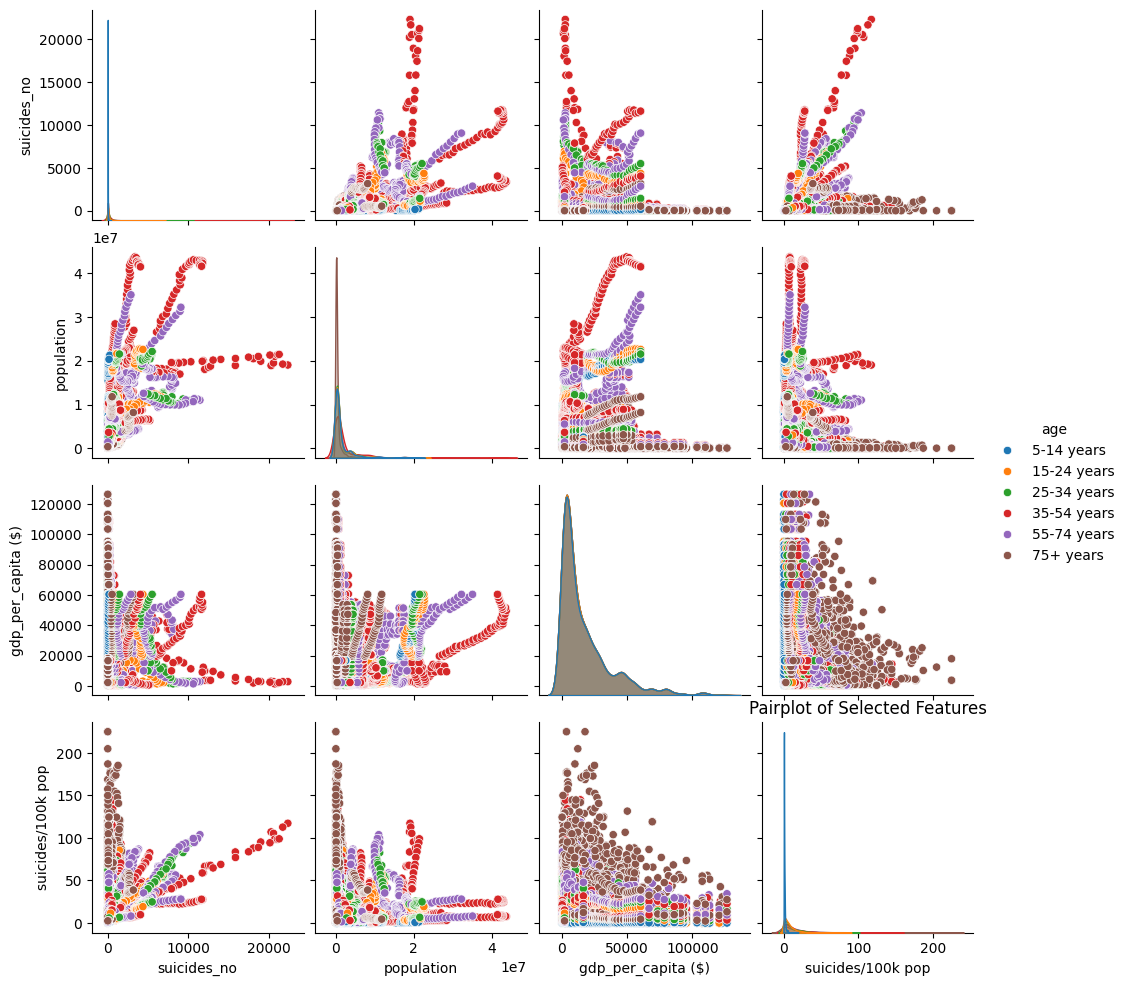

In [64]:
# Pairplot for selected features
plt.figure(figsize=(10, 10))
sns.pairplot(df_full[['suicides_no', 'population', 'gdp_per_capita ($)', 'suicides/100k pop', 'age']], hue='age')
plt.title("Pairplot of Selected Features")
plt.show()

In [65]:
X = df_encoded[['sex', 'age', 'generation', 'country', 'population', ' gdp_for_year ($) ']]
y = df_encoded['suicides/100k pop']

In [66]:
# Initialize lists to store evaluation metrics for each random_state
random_states = range(1, 51)
results = []

for state in random_states:
    # Split the dataset with the current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    # Perform standard scaling on the training and test sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append((state, mse, r2))
    
results_df = pd.DataFrame(results, columns=['Random State', 'MSE', 'R-Squared'])

# Print the best random_state based on the highest R-Squared
best_state = results_df.loc[results_df['MSE'].idxmin()]
print(f"Best Random State: {best_state['Random State']} with MSE: {best_state['MSE']:.2f} and R-Squared: {best_state['R-Squared']:.2f}")

Best Random State: 27.0 with MSE: 282.38 and R-Squared: 0.17


X: (38720, 6)
X_train: (30976, 6)
X_test: (7744, 6)
Mean Squared Error (MSE): 282.38
R-Squared (R2): 0.17
Model Coefficients: [ 7.17639194  3.65586222 -1.84317962  0.79872226  0.20132057  0.3968136 ]
Model Intercept: 12.346746513429752


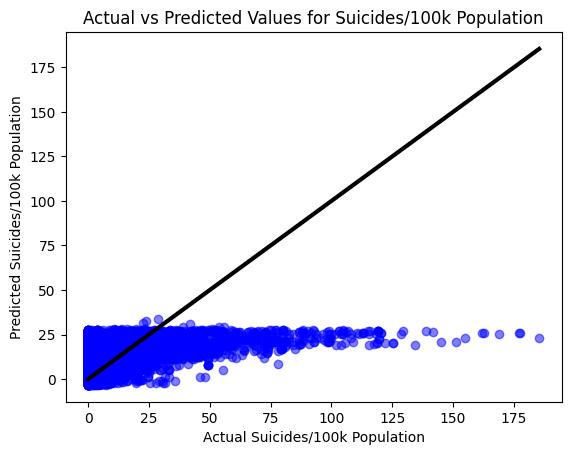

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Perform standard scaling on the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print size of data
print(f"X: {X.shape}")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

# Show the coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=3)
plt.xlabel('Actual Suicides/100k Population')
plt.ylabel('Predicted Suicides/100k Population')
plt.title('Actual vs Predicted Values for Suicides/100k Population')
plt.show()

X: (38720, 6)
X_train: (30976, 6)
X_test: (7744, 6)
Mean Squared Error (MSE): 66.25
R-Squared (R2): 0.20
Model Coefficients: [ 3.72090569  0.90660491 -1.06042064  0.51071038  0.13140901  0.65983051]
Model Intercept: 8.560634749483473


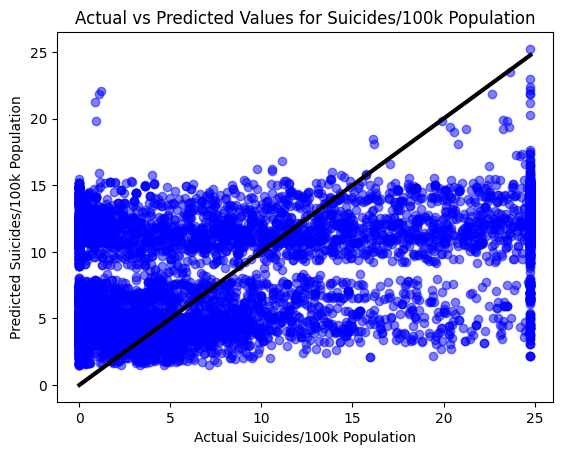

In [68]:
df_encoded['suicides/100k pop'] = df_encoded['suicides/100k pop'].clip(upper=df_encoded['suicides/100k pop'].quantile(0.85))
y = df_encoded['suicides/100k pop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Perform standard scaling on the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print size of data
print(f"X: {X.shape}")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

# Show the coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=3)
plt.xlabel('Actual Suicides/100k Population')
plt.ylabel('Predicted Suicides/100k Population')
plt.title('Actual vs Predicted Values for Suicides/100k Population')
plt.show()

In [69]:
# Function to calculate Mean Squared Error (MSE) for multiple features
def mean_square_error_multi(X, Y, w1, w):
    n = len(X)
    total_error = 0
    for i in range(n):
        prediction = w1 + np.dot(w, X[i, :])
        total_error += (prediction - Y[i]) ** 2
    mse = total_error / n
    return mse

# Function to calculate the gradients for MSE with multiple features
def gradient_mean_square_error_multi(X, Y, w1, w):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w = np.zeros(len(w))
    
    for i in range(n):
        prediction = w1 + np.dot(w, X[i, :])
        error = prediction - Y[i]
        partial_derivative_w1 += 2 * error
        partial_derivative_w += 2 * error * X[i, :]
    
    # Take the mean of the partial derivatives
    partial_derivative_w1 /= n
    partial_derivative_w /= n
    
    return partial_derivative_w1, partial_derivative_w

# Gradient Descent function for multiple features
def gradient_descent_multi(X, Y, w1, w, learning_rate, num_iterations):
    mse_list = []

    for i in range(num_iterations):
        # Calculate the partial derivatives
        partial_derivative_w1, partial_derivative_w = gradient_mean_square_error_multi(X, Y, w1, w)
        # Update weights and intercept
        w1 -= learning_rate * partial_derivative_w1
        w -= learning_rate * partial_derivative_w

        # Calculate and store the MSE
        mse = mean_square_error_multi(X, Y, w1, w)
        mse_list.append(mse)
        
        # Print MSE for the first few iterations to check for instability
        if i % 100 == 0 and i >= 100:
            print(f"Iteration {i}, MSE: {mse}")
    
    return w1, w, mse_list

Iteration 100, MSE: 67.51512314421309
Iteration 200, MSE: 67.51512314421306
Iteration 300, MSE: 67.51512314421305
Iteration 400, MSE: 67.51512314421305
Iteration 500, MSE: 67.51512314421305
Iteration 600, MSE: 67.51512314421305
Iteration 700, MSE: 67.51512314421305
Iteration 800, MSE: 67.51512314421305
Iteration 900, MSE: 67.51512314421305


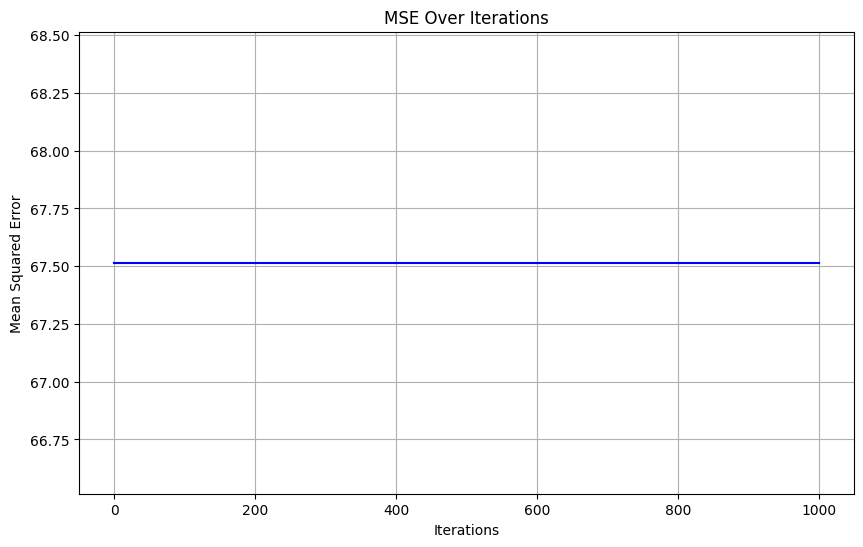

Final Intercept (w1): 8.560634749483473
Final Coefficients (w): [ 3.72090569  0.90660491 -1.06042064  0.51071038  0.13140901  0.65983051]


In [70]:
X_scaled = X_train_scaled
y = y_train.values

# Initial weights and intercept from linear regression model
initial_w1 = model.intercept_
initial_w = model.coef_

# Define learning rate and number of iterations
learning_rate = 0.001
iterations = 1000

# Perform gradient descent
final_w1, final_w, mse_final_list = gradient_descent_multi(X_scaled, y, initial_w1, initial_w, learning_rate, iterations)

# Plot the MSE Over Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_final_list)), mse_final_list, color='blue')
plt.title('MSE Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.ylim(min(mse_final_list)-1, max(mse_final_list)+1)
plt.grid(True)
plt.show()

# Print the final intercept and coefficients
print("Final Intercept (w1):", final_w1)
print("Final Coefficients (w):", final_w)

Out-of-Bag Score: 0.8634744610644338
Mean Squared Error: 8.045269962932535
R-squared: 0.9026487173207829


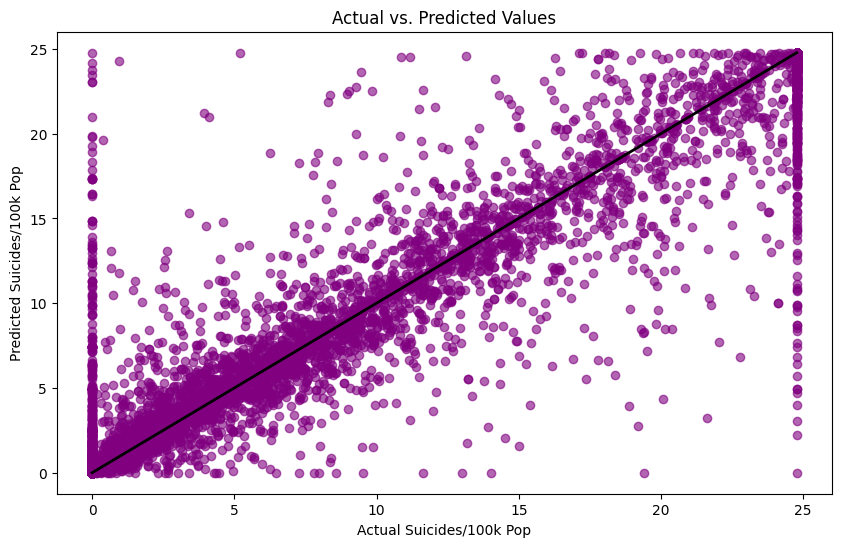

In [71]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=27, oob_score=True)
rf_regressor.fit(X_train_scaled, y_train)

# Access the OOB Score
oob_score = rf_regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2, label='Perfect Fit')
plt.xlabel('Actual Suicides/100k Pop')
plt.ylabel('Predicted Suicides/100k Pop')
plt.title('Actual vs. Predicted Values')
plt.show()

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV Score: 0.9034358033357891
Out-of-Bag Score: 0.9127659133921329
Mean Squared Error: 7.24570761933224
R-squared: 0.9123237711213539


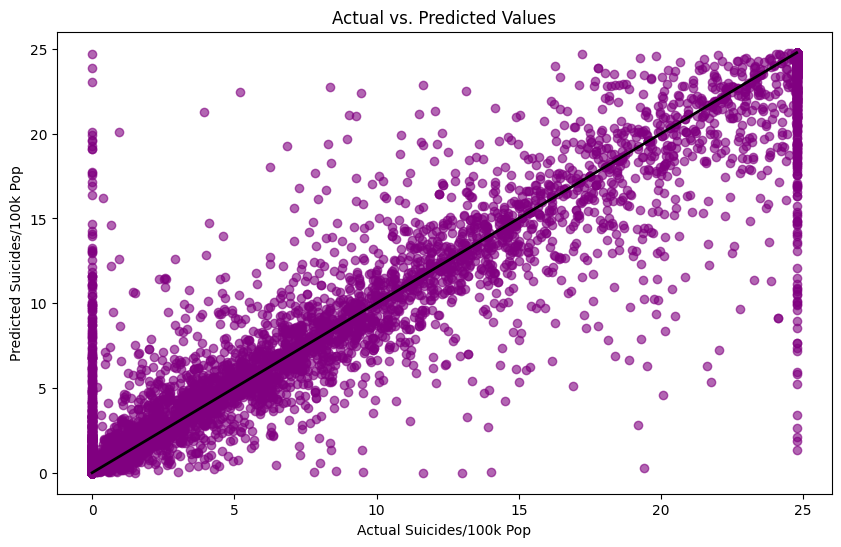

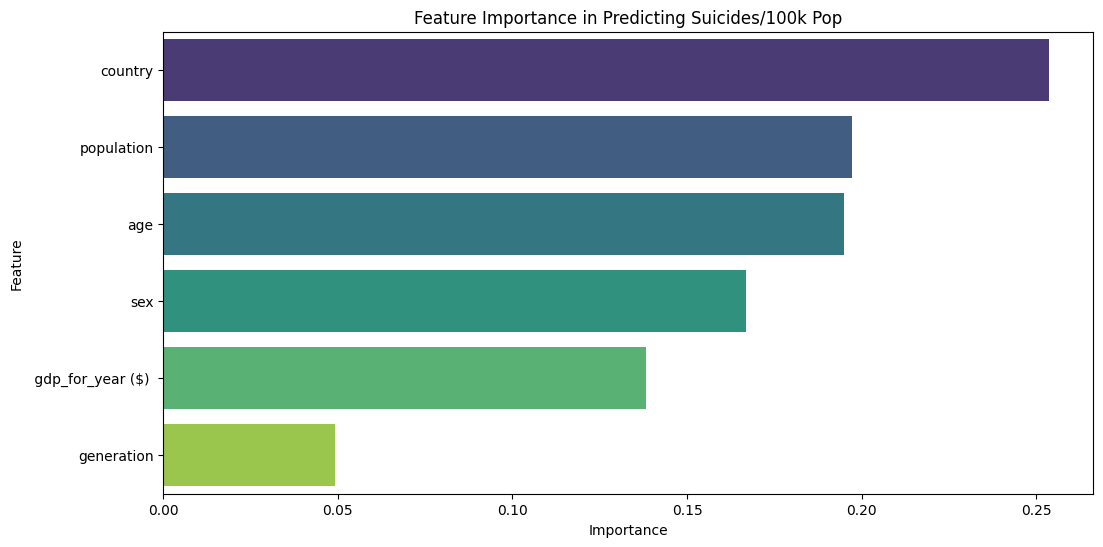

In [72]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the Random Forest model
rf = RandomForestRegressor(random_state=27, oob_score=True)

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Access the best model after GridSearch
best_rf_model = grid_search.best_estimator_

# Access the OOB Score
oob_score = best_rf_model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2, label='Perfect Fit')
plt.xlabel('Actual Suicides/100k Pop')
plt.ylabel('Predicted Suicides/100k Pop')
plt.title('Actual vs. Predicted Values')
plt.show()

# Feature importance from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance in Predicting Suicides/100k Pop')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()